# Machine Learning - 3rd Evaluation Project Phase

### 1) Census Income Prediction project 

-- Project Description:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 
The prediction task is to determine whether a person makes over $50K a year.

-- Feature Description:

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1)  A single cell estimate of the population 16+ for each state.

2)  Controls for Hispanic Origin by age and sex.

3)  Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [147]:
census = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
census.shape

(32560, 15)

In [4]:
census.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [5]:
census.tail(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
#Checking for null values
census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

-- No null values in the given dataset.

In [148]:
#Checking for duplicates
census.duplicated().sum()

24

In [149]:
census_1 = census.drop_duplicates()
census_1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


-- Duplicate values removed successfully..

In [29]:
#Checking for dataset info
census_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [30]:
#Checking the number of unique values of each column
census_1.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [31]:
#Now we split the data into numerical and categorical columns
cat_col = []
for i in census_1.dtypes.index:
    if census_1.dtypes[i] == "object":
        cat_col.append(i)
print("Categorical Variables: ",cat_col)

Categorical Variables:  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [32]:
num_col = []
for i in census_1.dtypes.index:
    if census_1.dtypes[i] != "object":
        num_col.append(i)
print("Numerical Variables: ",num_col)

Numerical Variables:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [33]:
#Checking unique variables in categorical columns
for i in cat_col:
    print(f"Categories in {i} variable: ",end=" ")
    print(census_1[i].unique())

Categories in Workclass variable:  [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Categories in Education variable:  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Categories in Marital_status variable:  [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Categories in Occupation variable:  [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
Categories in Relationship variable:  [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Categories in Race variable:  [' White

-- Froom the above cell, we see there is a '?' unique variable, we are going to remove the rows containing this variable as it will be easier for our future predictions.

In [150]:
census_2 = census_1[census_1['Native_country'] != ' ?']
census_2

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [151]:
census_3 = census_2[census_2['Occupation'] != ' ?']
census_3

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [46]:
cat_col = []
for i in census_3.dtypes.index:
    if census_3.dtypes[i] == "object":
        cat_col.append(i)
print("Categorical Variables: ",cat_col)

Categorical Variables:  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [47]:
for i in cat_col:
    print(f"Categories in {i} variable: ",end=" ")
    print(census_3[i].unique())

Categories in Workclass variable:  [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
Categories in Education variable:  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
Categories in Marital_status variable:  [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Categories in Occupation variable:  [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' Craft-repair'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Categories in Relationship variable:  [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Categories in Race variable:  [' White' ' Black' ' Asian-Pac-Isla

### Univariate Analysis 

In [48]:
census_3.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,30138.000000,3.013800e+04,30138.000000,30138.000000,30138.000000,30138.000000
mean,38.441702,1.897988e+05,10.122437,1092.805329,88.442863,40.934734
std,13.131643,1.056584e+05,2.548727,7409.230902,404.451628,11.978951
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176295e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784190e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376062e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


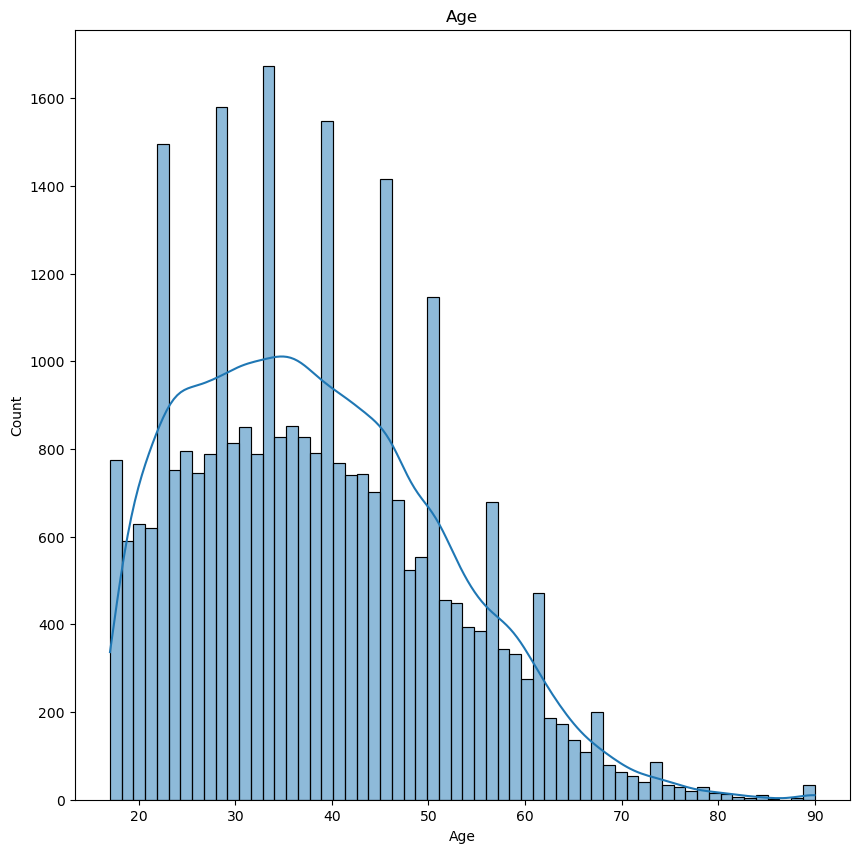

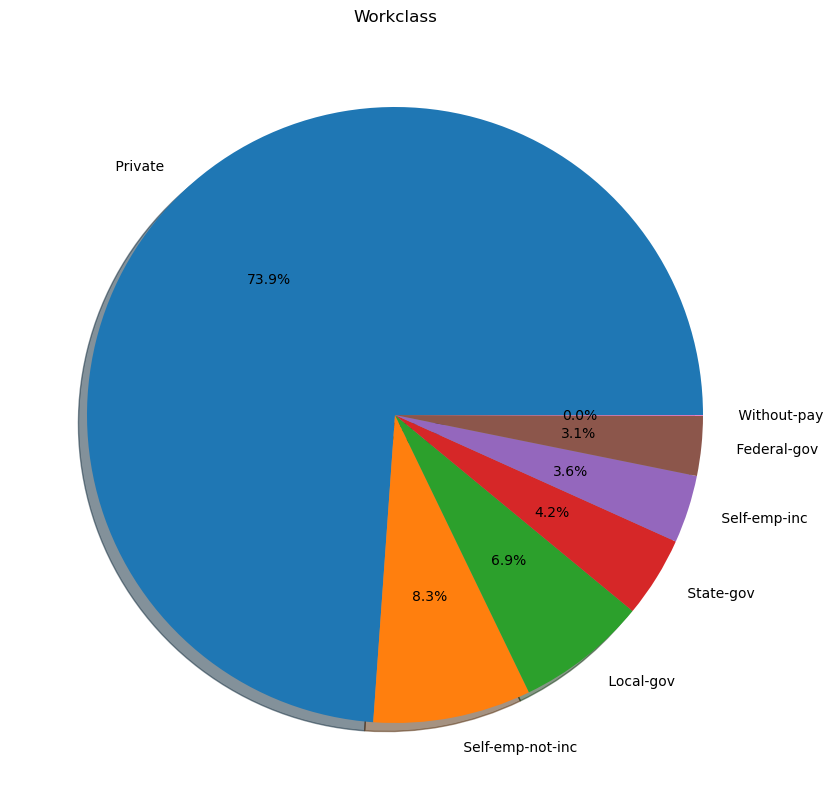

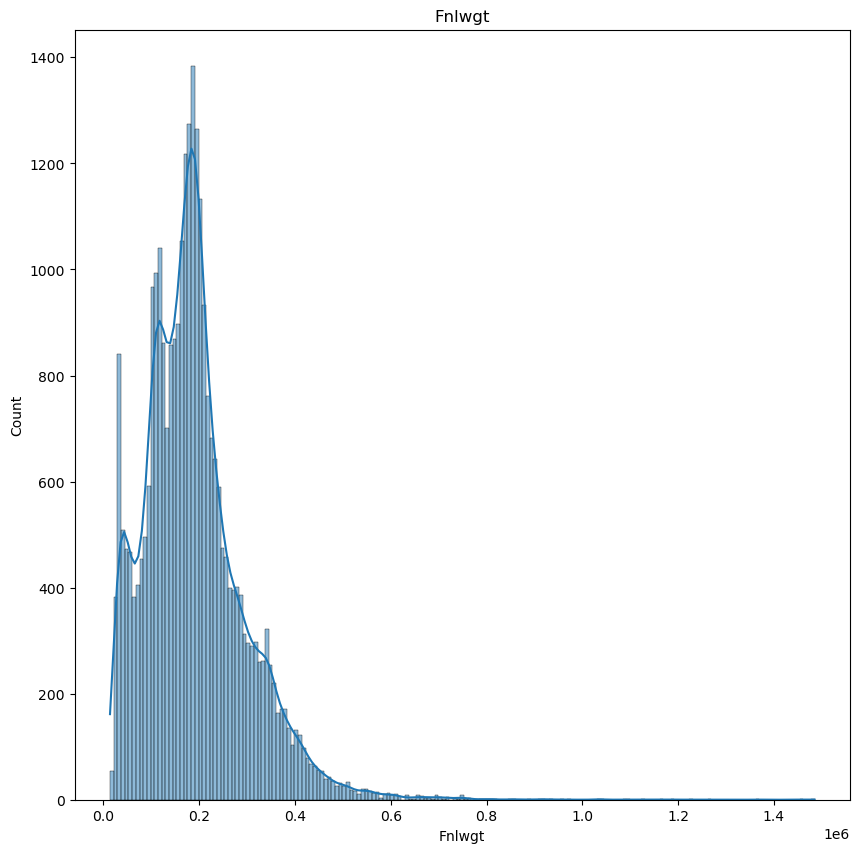

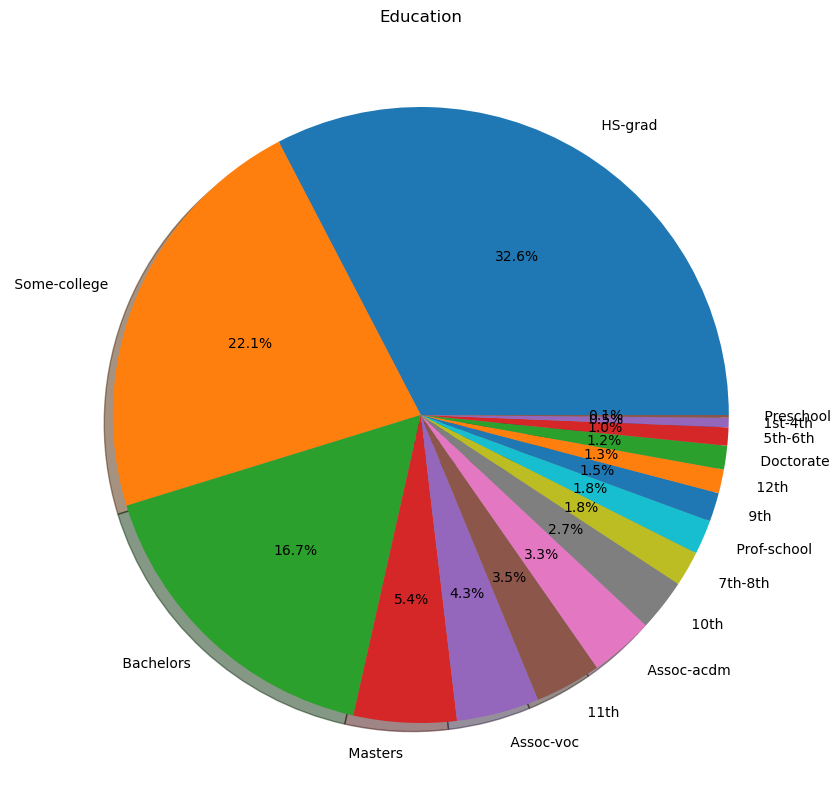

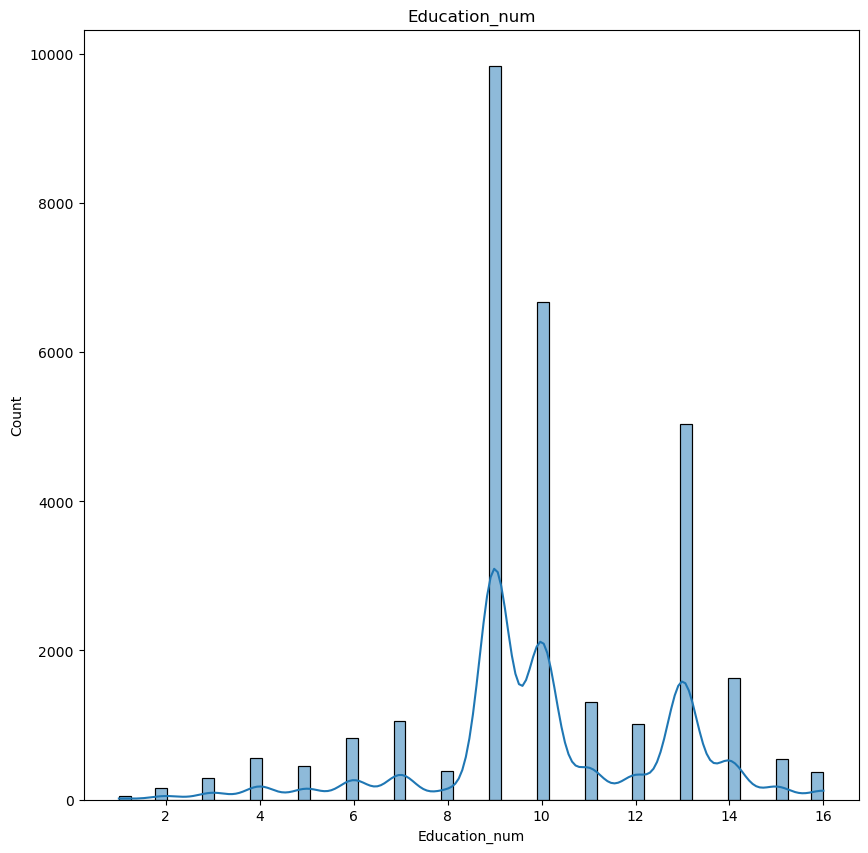

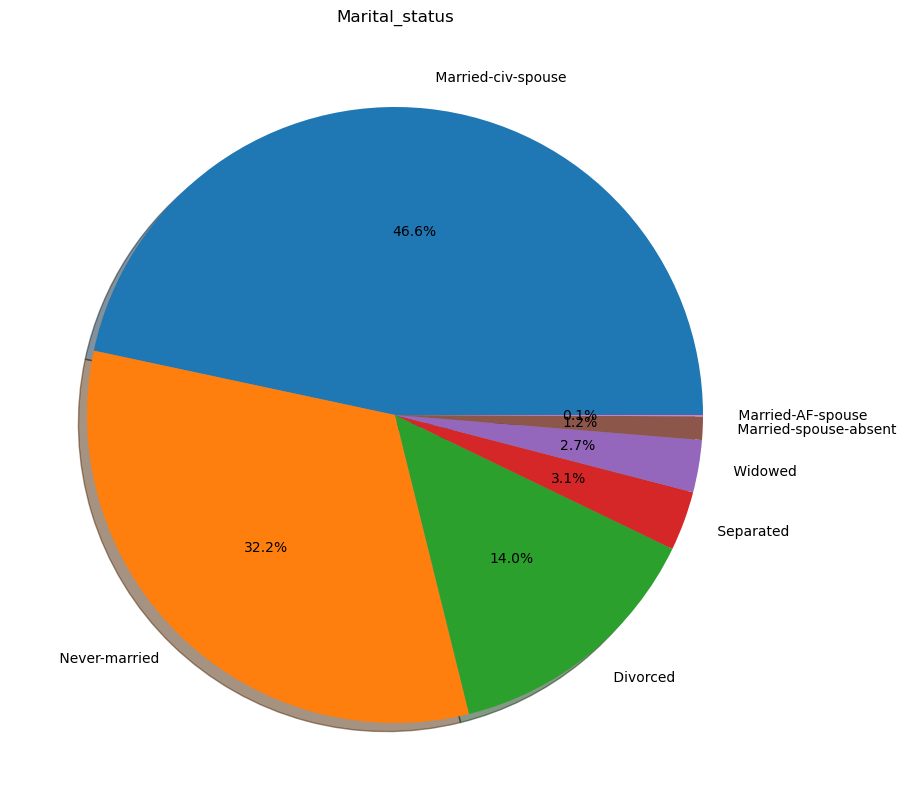

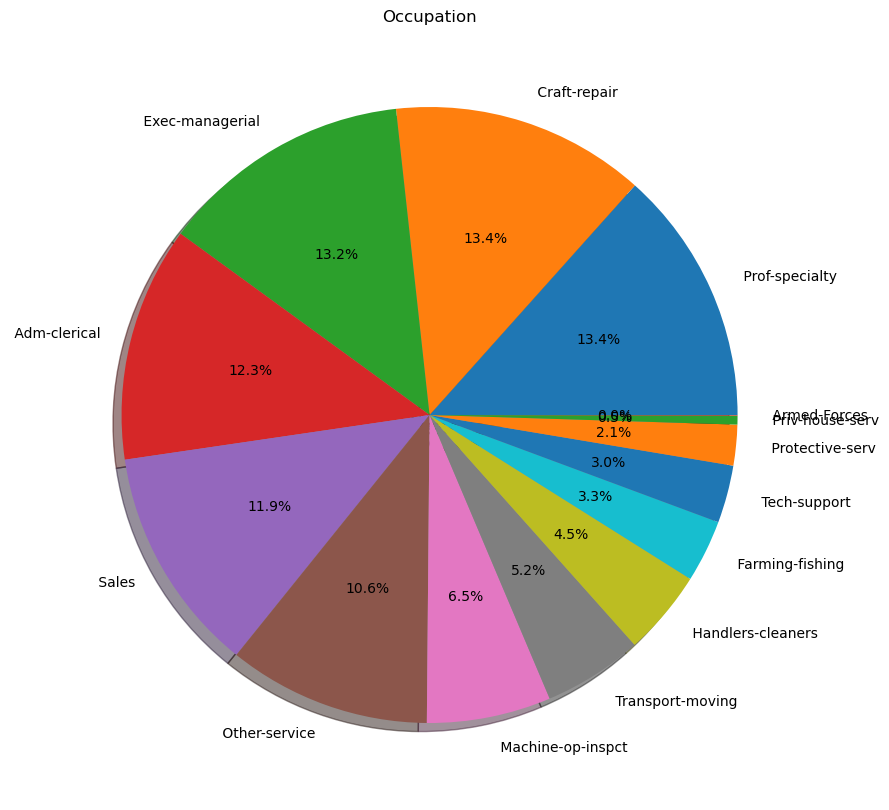

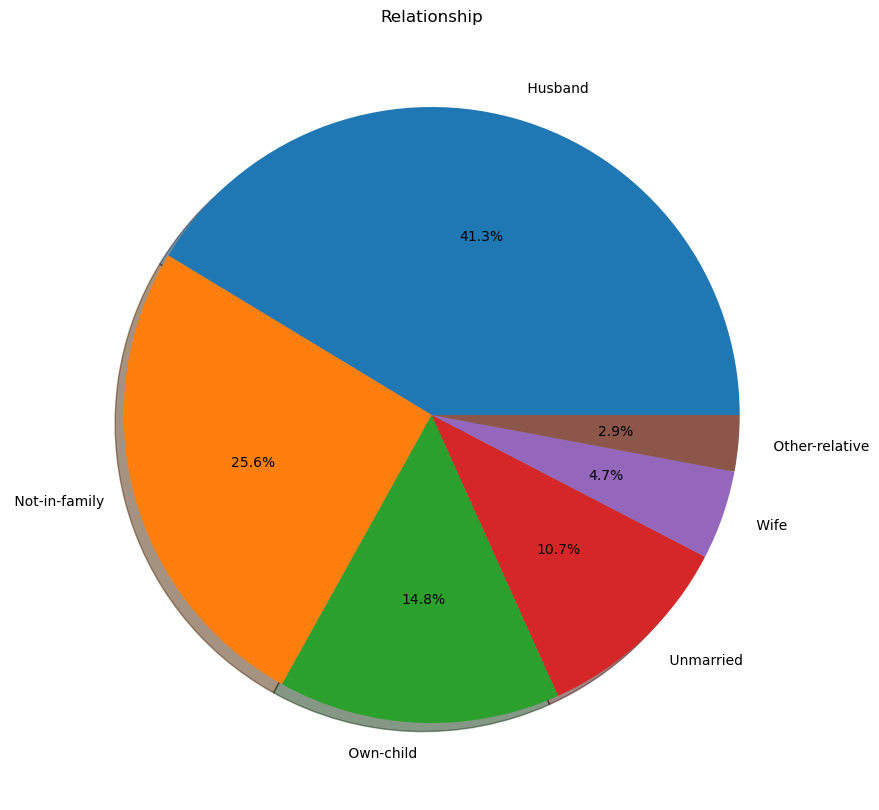

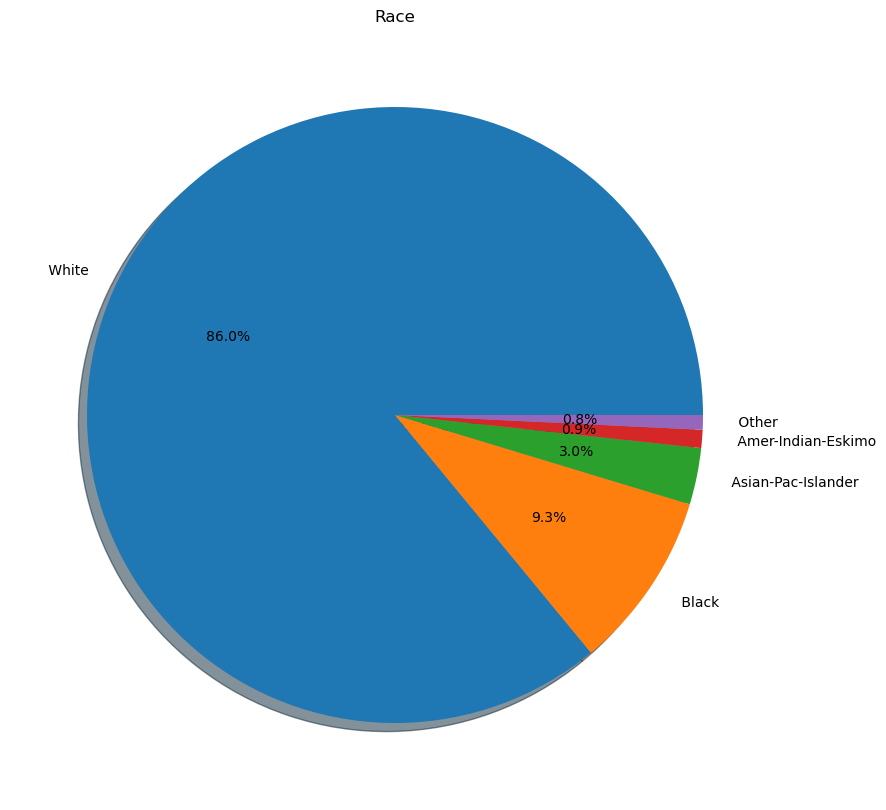

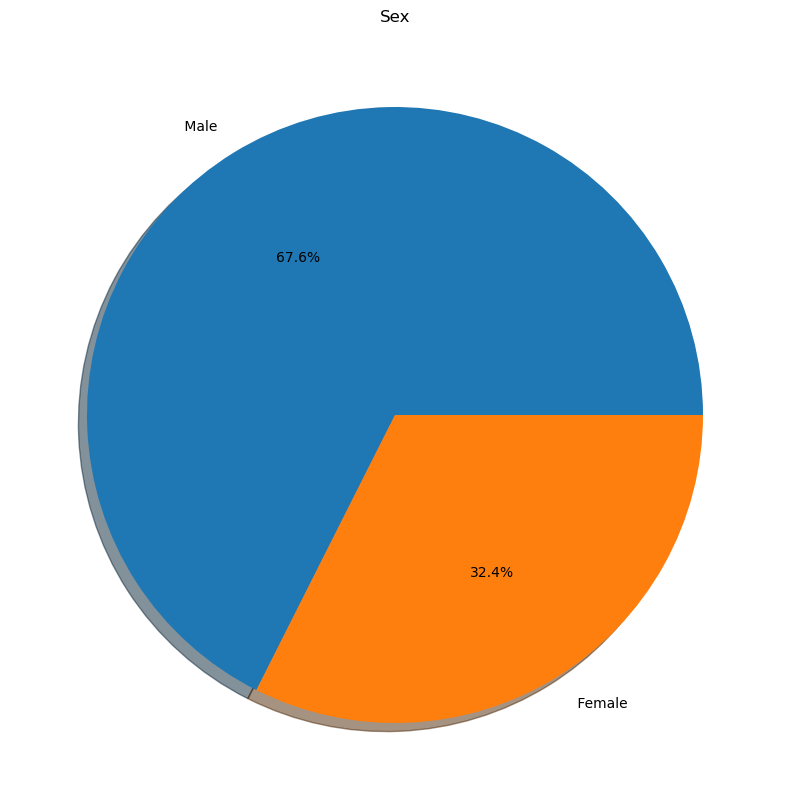

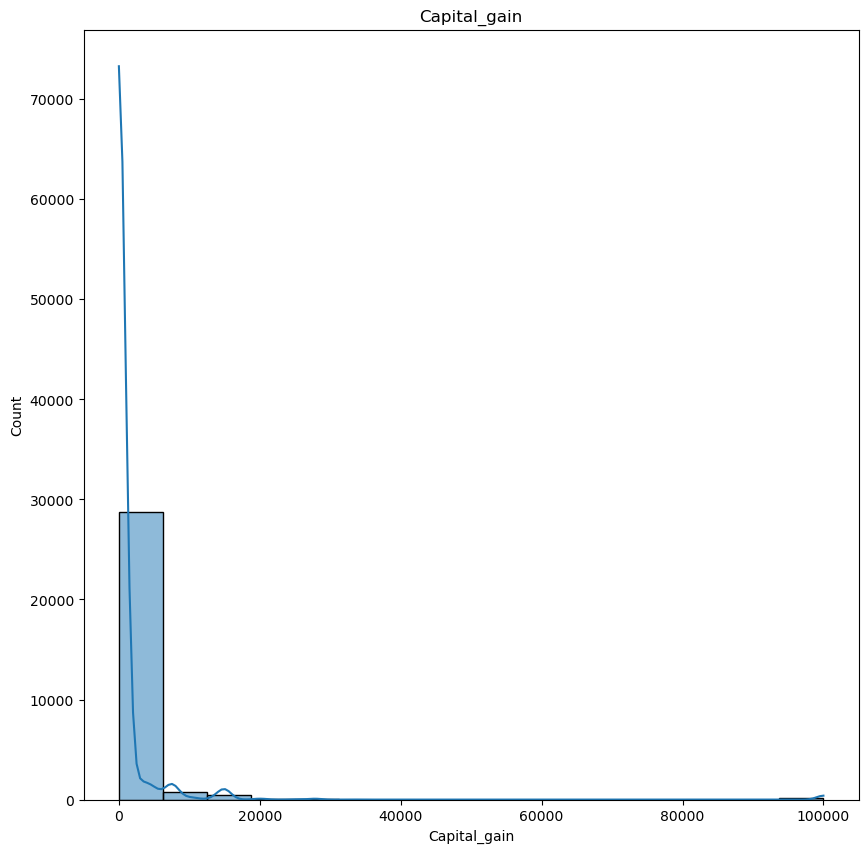

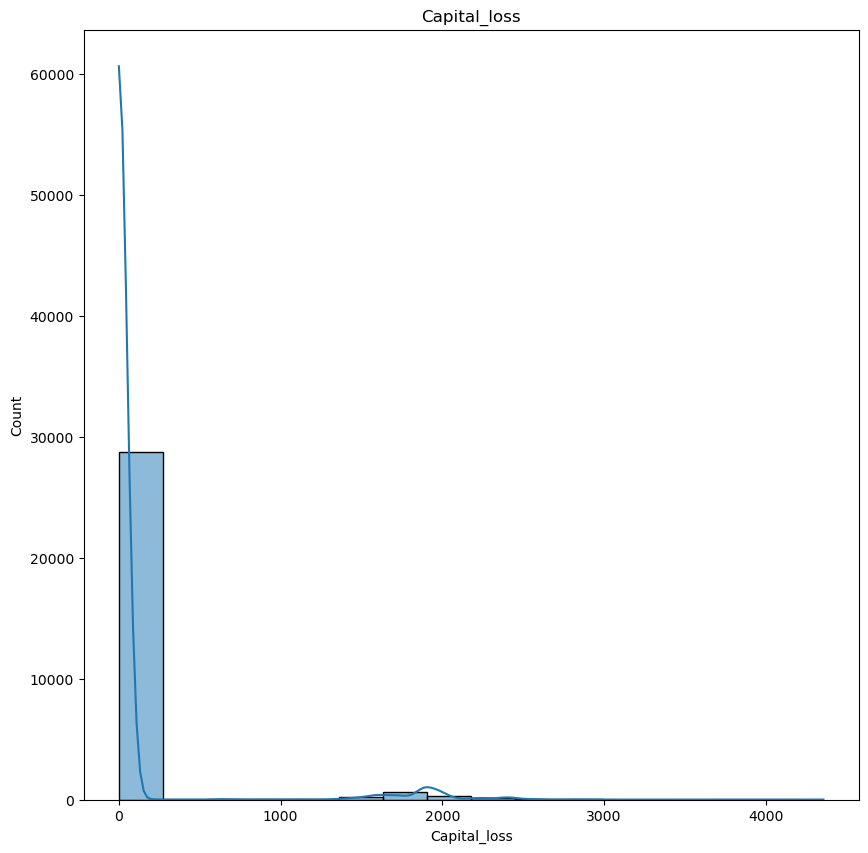

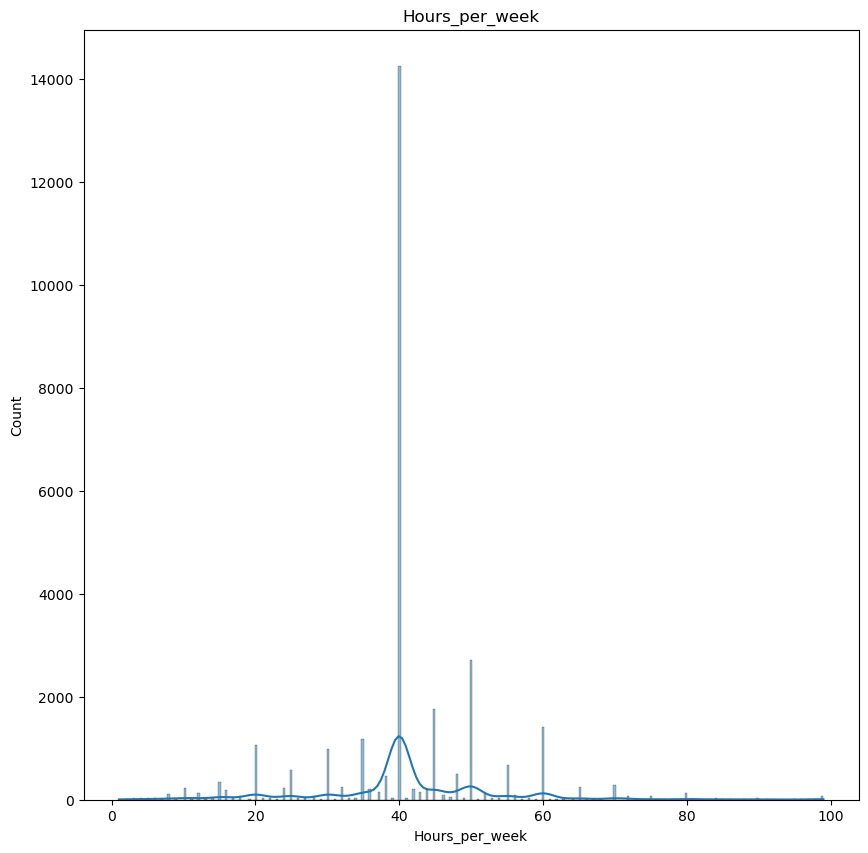

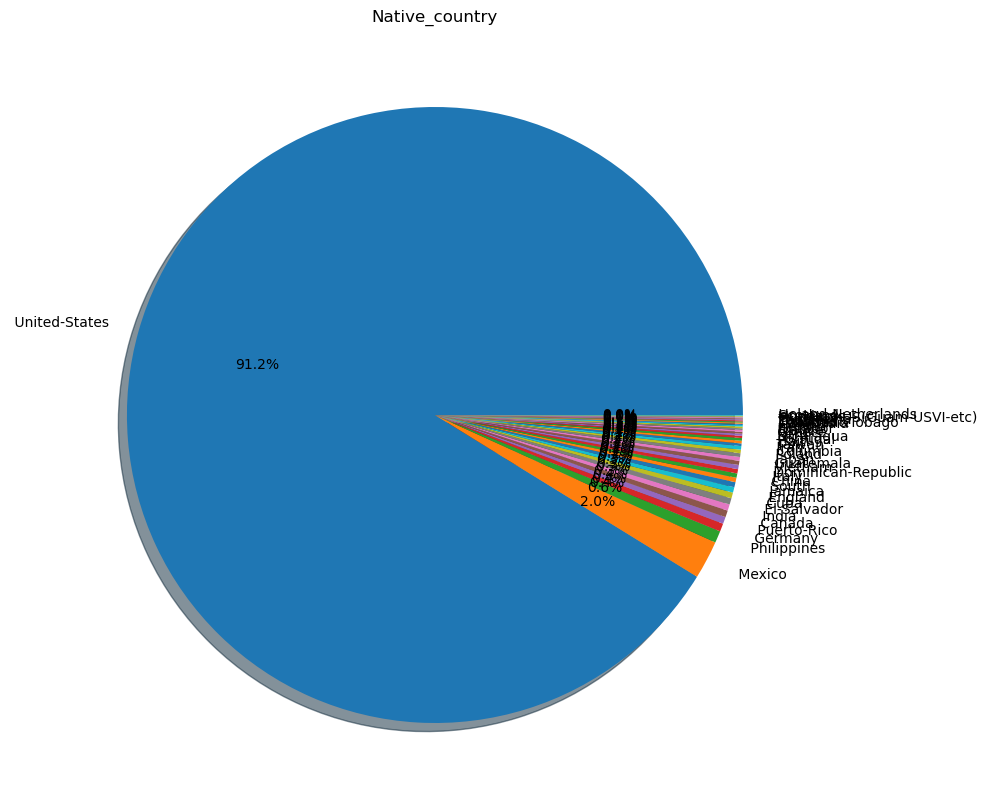

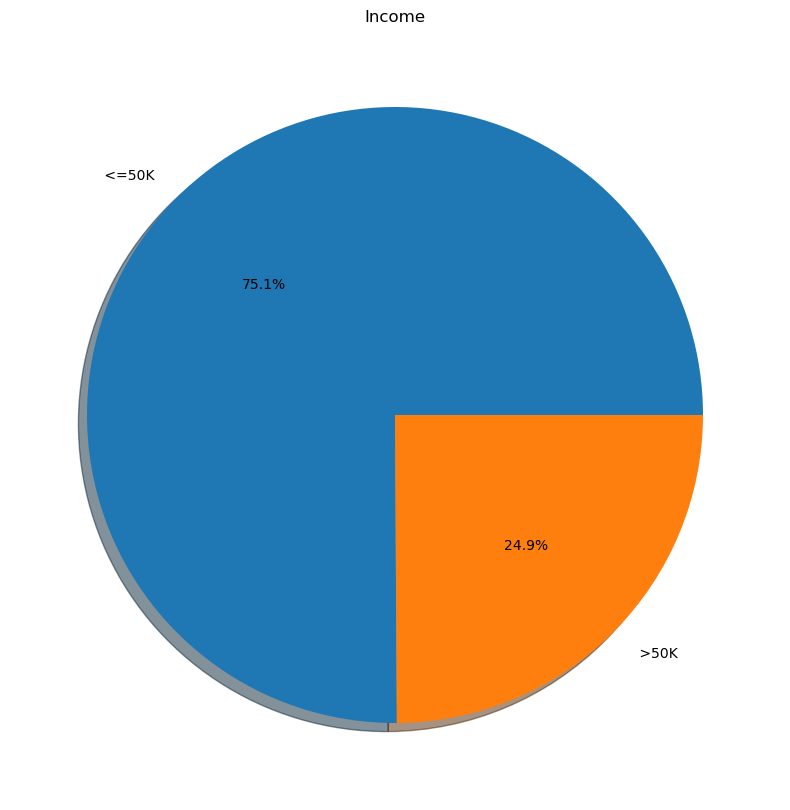

In [50]:
# Analysing each column
for column in census_3:
    plt.figure(column, figsize = (10,10))
    plt.title(column)
    if census_3[column].dtypes == "object":
        sizes = census_3[column].value_counts()
        plt.pie(sizes.values,labels=sizes.index,autopct = '%1.1f%%',shadow=True)
    elif census_3[column].dtypes != "object":
        sns.histplot(x = column,data = census_3,kde=True)

### Bivariate Analysis 

In [51]:
# Relationship between Categorical features and dependent feature
categorical_features = [feature for feature in census_3.columns if ((census_3[feature].dtypes=='O') and (feature not in ['Income']))]
categorical_features

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country']

<Figure size 1500x3000 with 0 Axes>

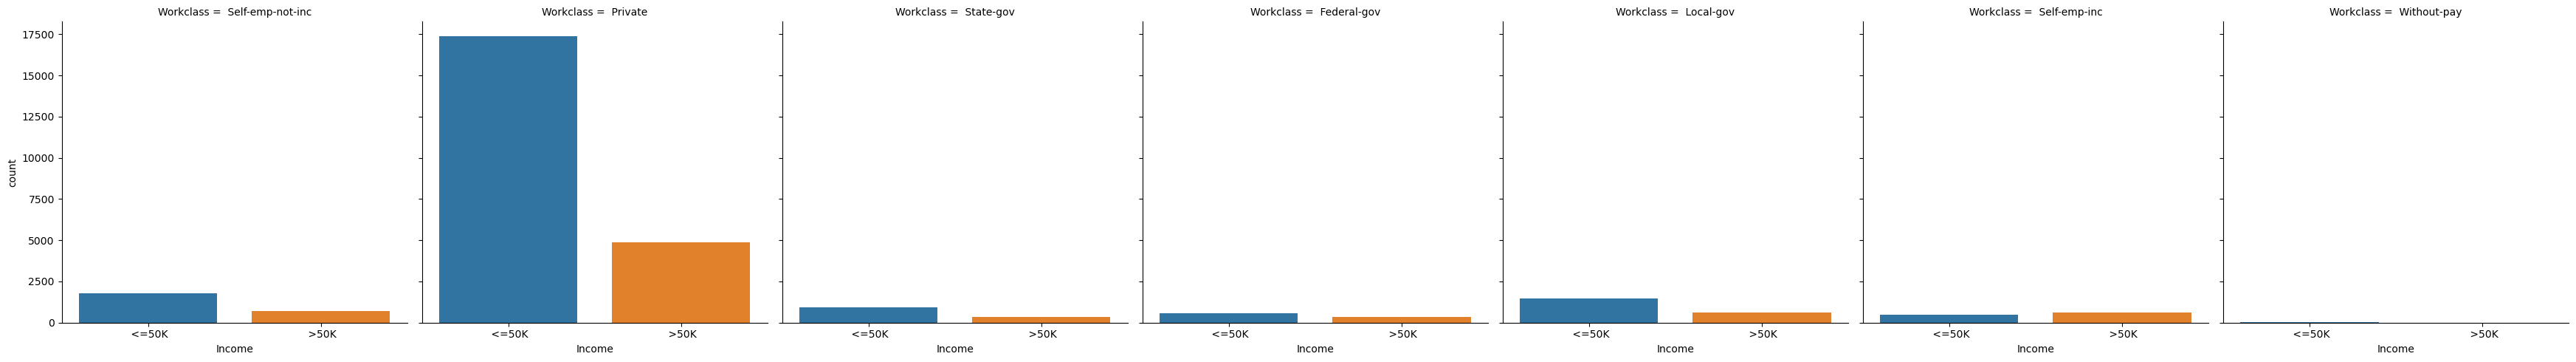

<Figure size 1500x3000 with 0 Axes>

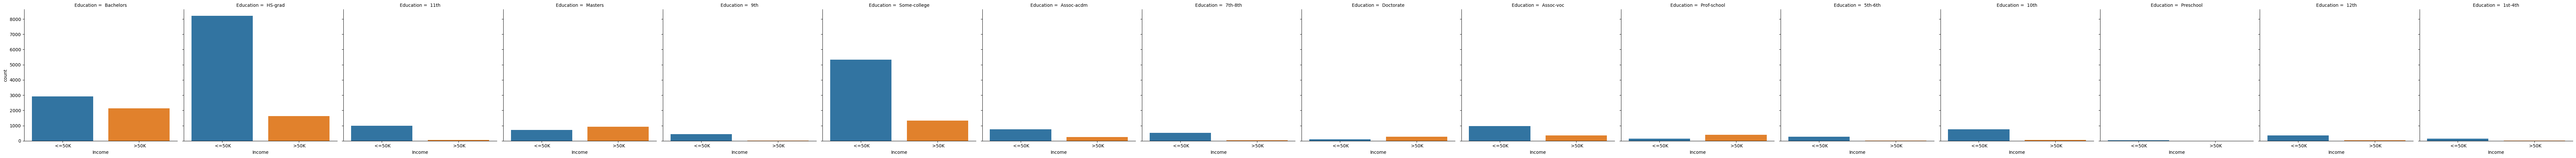

<Figure size 1500x3000 with 0 Axes>

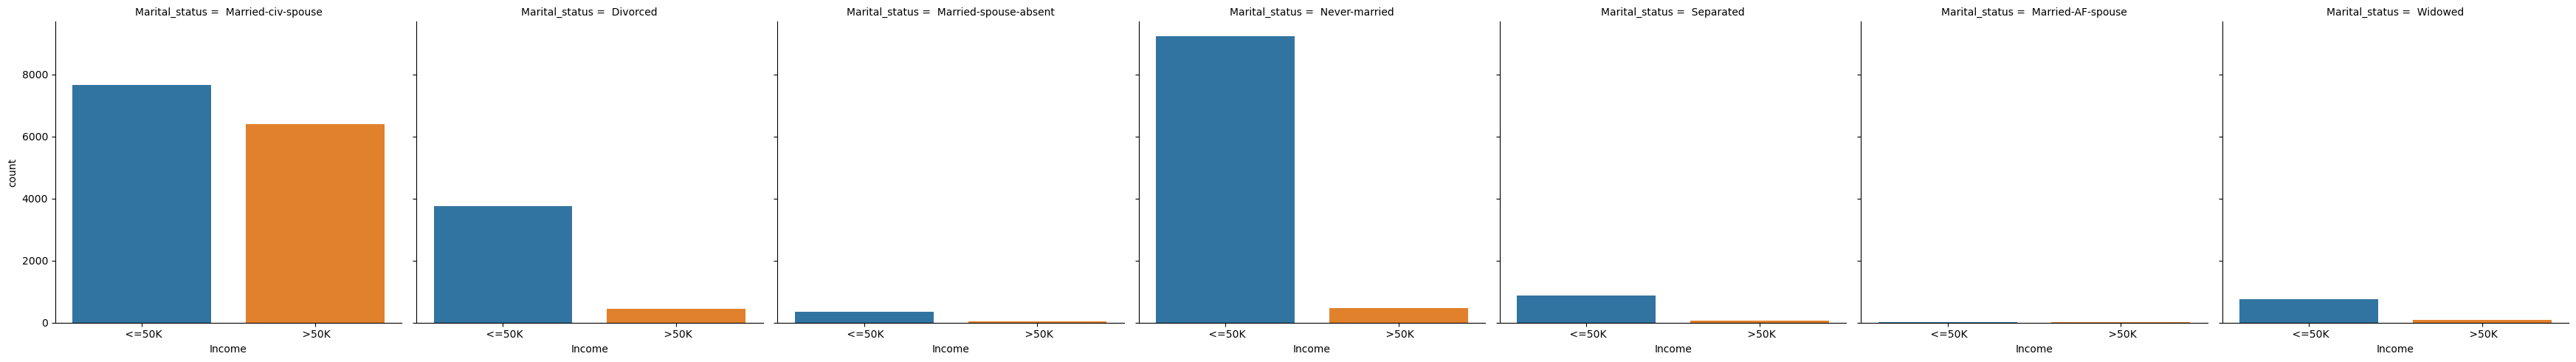

<Figure size 1500x3000 with 0 Axes>

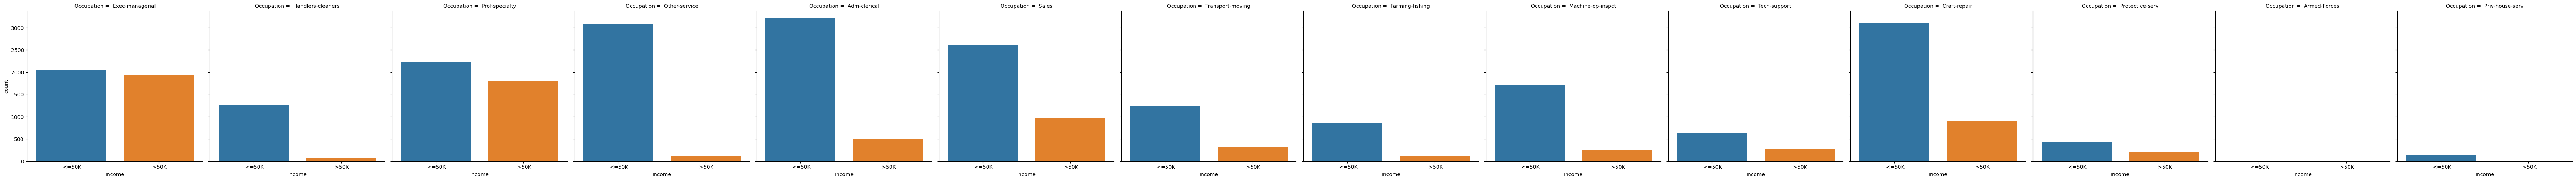

<Figure size 1500x3000 with 0 Axes>

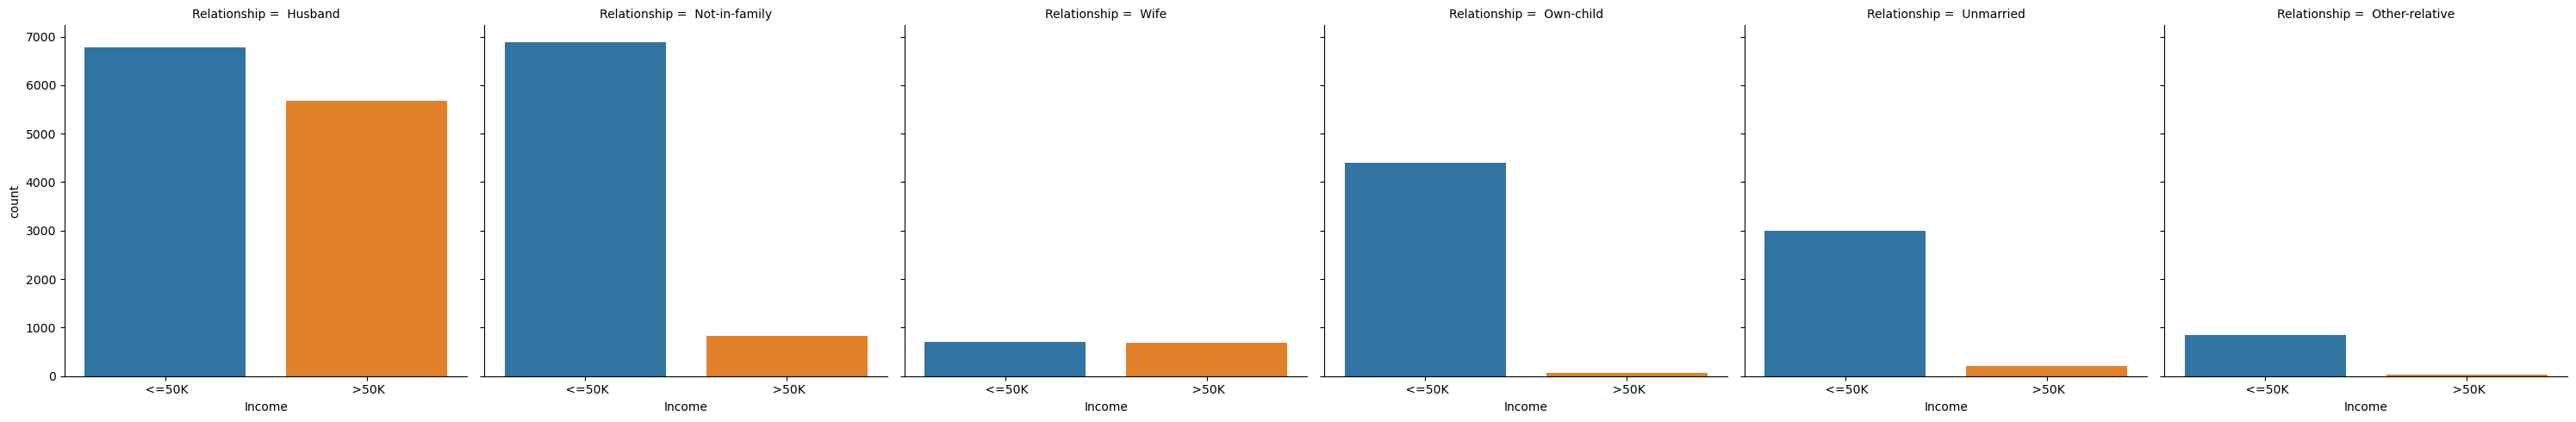

<Figure size 1500x3000 with 0 Axes>

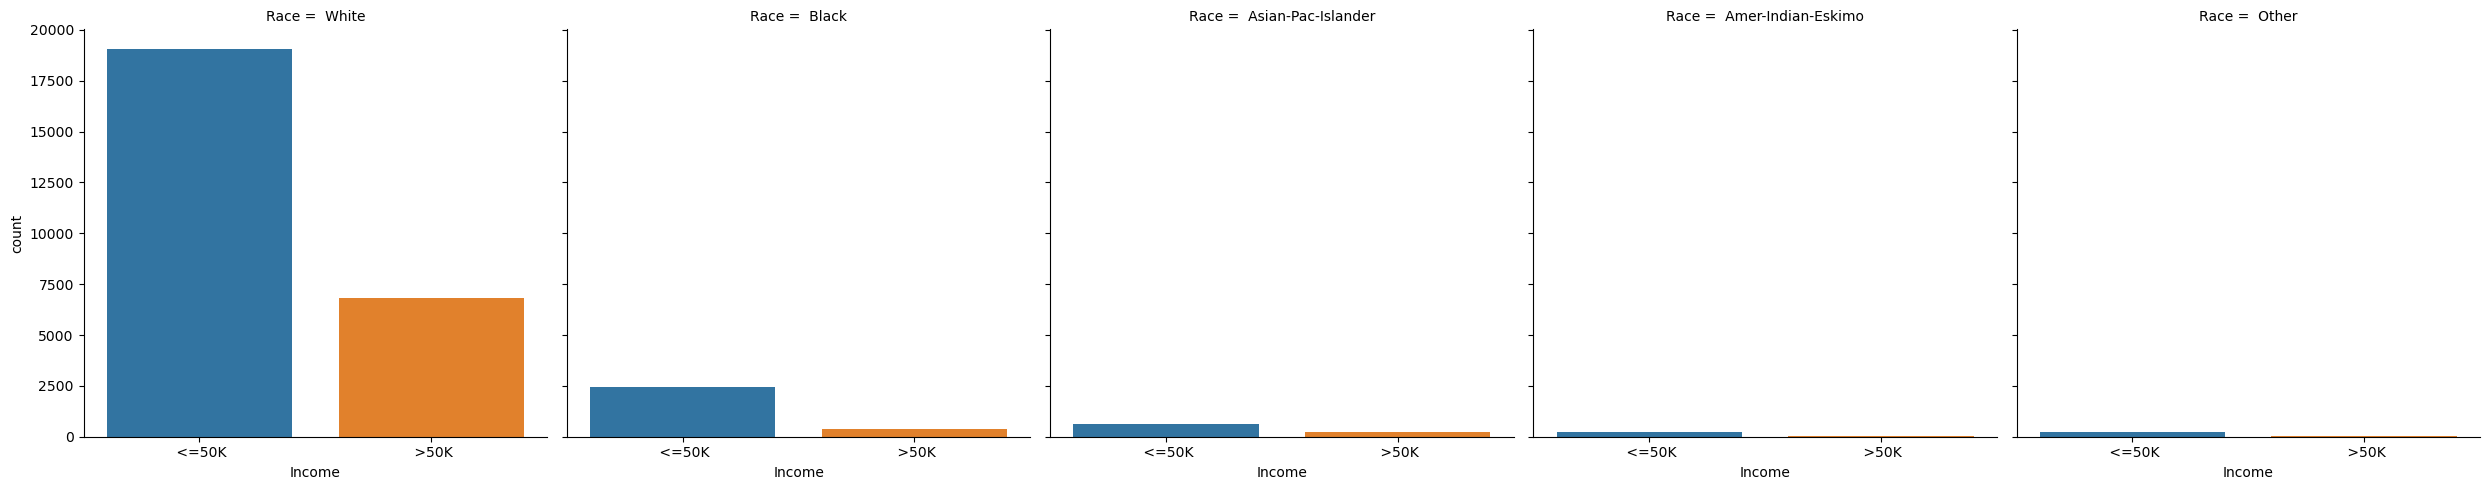

<Figure size 1500x3000 with 0 Axes>

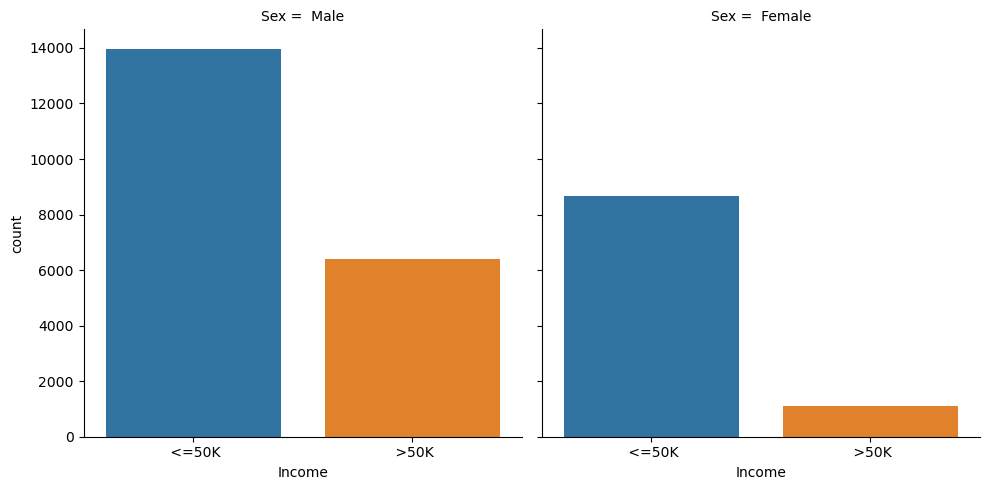

<Figure size 1500x3000 with 0 Axes>

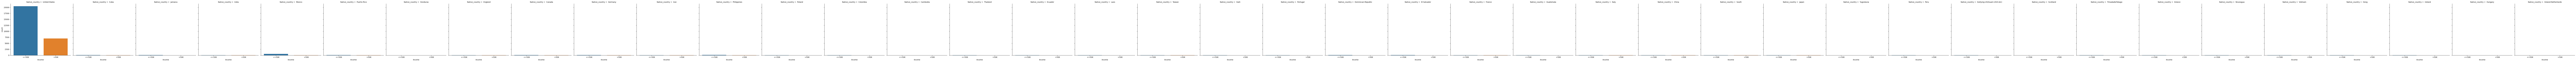

In [52]:
for categorical_feature in categorical_features:
    plt.figure(figsize=(15,30))
    sns.catplot(x='Income',col=categorical_feature,kind='count',data = census_3)
plt.show()

In [53]:
for categorical_feature in categorical_features:
    print(census_3.groupby(['Income',categorical_feature]).size())

Income  Workclass        
 <=50K   Federal-gov           578
         Local-gov            1458
         Private             17390
         Self-emp-inc          474
         Self-emp-not-inc     1784
         State-gov             934
         Without-pay            14
 >50K    Federal-gov           365
         Local-gov             609
         Private              4874
         Self-emp-inc          600
         Self-emp-not-inc      714
         State-gov             344
dtype: int64
Income  Education    
 <=50K   10th             761
         11th             989
         12th             348
         1st-4th          143
         5th-6th          275
         7th-8th          521
         9th              430
         Assoc-acdm       752
         Assoc-voc        963
         Bachelors       2915
         Doctorate         95
         HS-grad         8218
         Masters          708
         Preschool         44
         Prof-school      136
         Some-college    5334
 >50

Take-Away's:

1) From the above barplot between the categorical and dependent feature, we see the relation among the two sets of variables.

   a) Working Class vs Income relation:
   
     We see that in the dataset provided, most of the people belong to the 'private' working  class and majority of the 'private' working class have an income <= 50k than the same class of people earning more than 50k.
     
   b) Education vs Income relation:
   
     Amongst all the education classes provided in the dataset, majority of the people in the dataset are High school graduates (HS-grads) and most of the HS-grads have an income of <=50k than the grads having an income of over 50k. 
     Coming in at next places in the dataset are people who went to 'college' and people who completed their 'Bachelors', and in these two sets majority have an income of <=50k.
     
   c) Marital Status vs Income relation:
   
     We can see from the above barplot, most of the people in the dataset belong to 'Married-civ-spouse' (which corresponds to a civilian spouse) and most of these couples have an income of <= 50k but the count of the same couples having an income of >50k is also higher. It is not in the case of 'Never-Married' as the ratio of people having an income of <=50k is way higher than people earning more than 50k (>50k).
     
   d) Occupation vs Income relation:
   
     We see from the above pie-chart of Occupation, The people in the dataset have roles like 'Craft-repair','Prof-specialty' and 'Exec-managerial' the most. And from the barplot between Occupation and Income, we see that from the three roles mentioned the count of people having income <=50k is more than that of people having an income >50k. Specifically, The job role 'Craft-repair' has more people earning <=50k than earning >50k, but from the job role of 'Exec-managerial' we see an almost equal amount of people earning <=50k and >50k. We can also say that the role 'Exec-managerial' is a high paying job, with 'Prof-Specialty' coming second.
     
   e) Race vs Income relation:
   
      We see that in the dataset provided, most of the people belong to the 'white' race and majority of the 'white' race people have an income <= 50k than the same class of people earning more than 50k.

In [54]:
#Relationship between Numerical features and dependent feature
numerical_features = [feature for feature in census_3.columns if ((census_3[feature].dtypes !='O') and (feature not in ['Income']))]
numerical_features

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

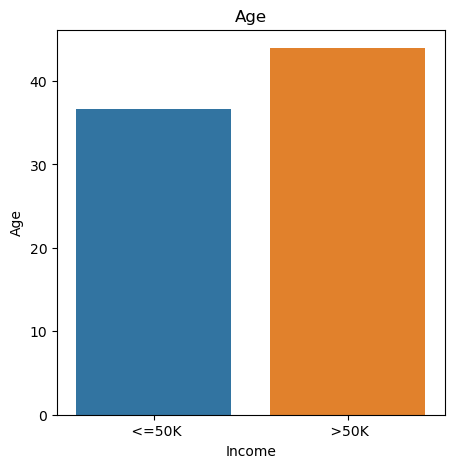

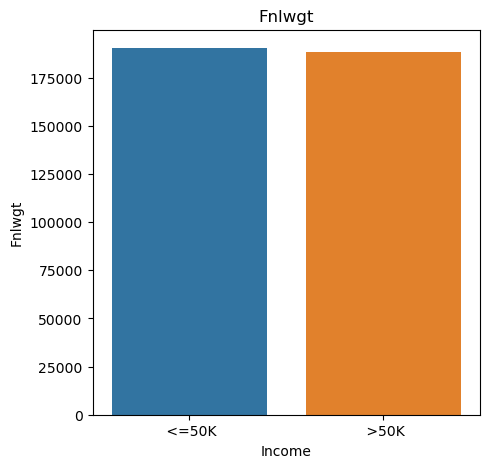

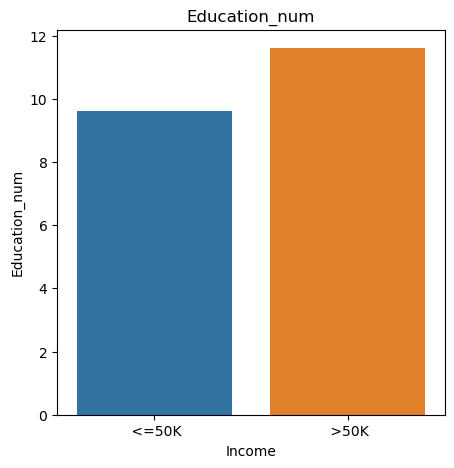

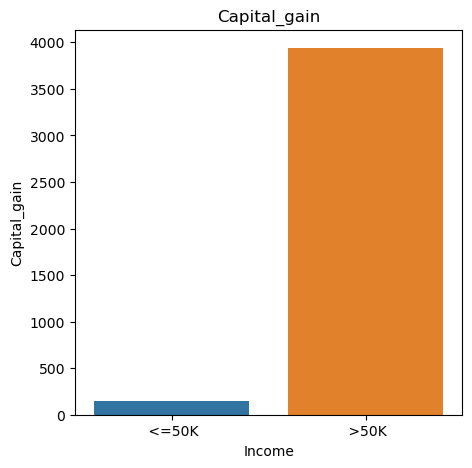

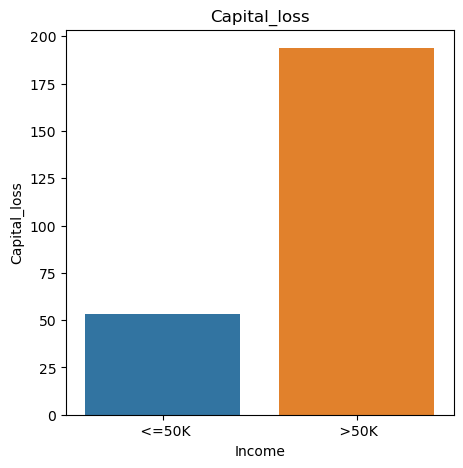

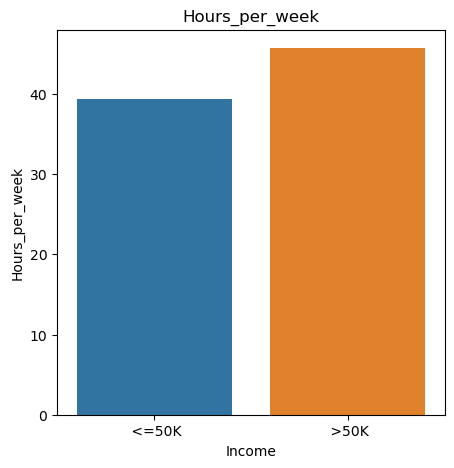

In [55]:
for column in census_3:
    if census_3[column].dtypes != "object":
        plt.figure(column, figsize = (5,5))
        sns.barplot(x = 'Income',y = column,data = census_3,errorbar=None)
        plt.title(column)

Take-Away's:

-- From the above barplot between the numerical and dependent feature, we see the relation among the two sets of variables.

1) Age vs Income Relation:

     As we can see from the barplot between age and Income, people with age more than 40 have an income of >50k and people with age less than 40 have an income of <=50k.
     
     
2) Education_Num vs Income Relation:

    From the above barplot between Eduaction_num (Number representation of the highest education level) and Income, we can see that people with more than 10 years of education have an income of >50k and people with less than 10 have an income of <=50k.
    
    
3) Capital gain/loss vs Income relation:

    From the above barplots between capital gain/loss (capital earned or lost through investment) and Income, we see that the rate of earnings or losses of capital is increasingly more in people having an income of >50k than people having an income of <=50k.
    
    
4) Hours_per_week vs Income relation:

    As we can see from the above barplot between Hours_per_week (number of hours an individual spends working) and Income, people working more than 40 hours per week have an income of >50k and people working 40 hours or less in a week have an income of <=50k.

### Multivariate Analysis 

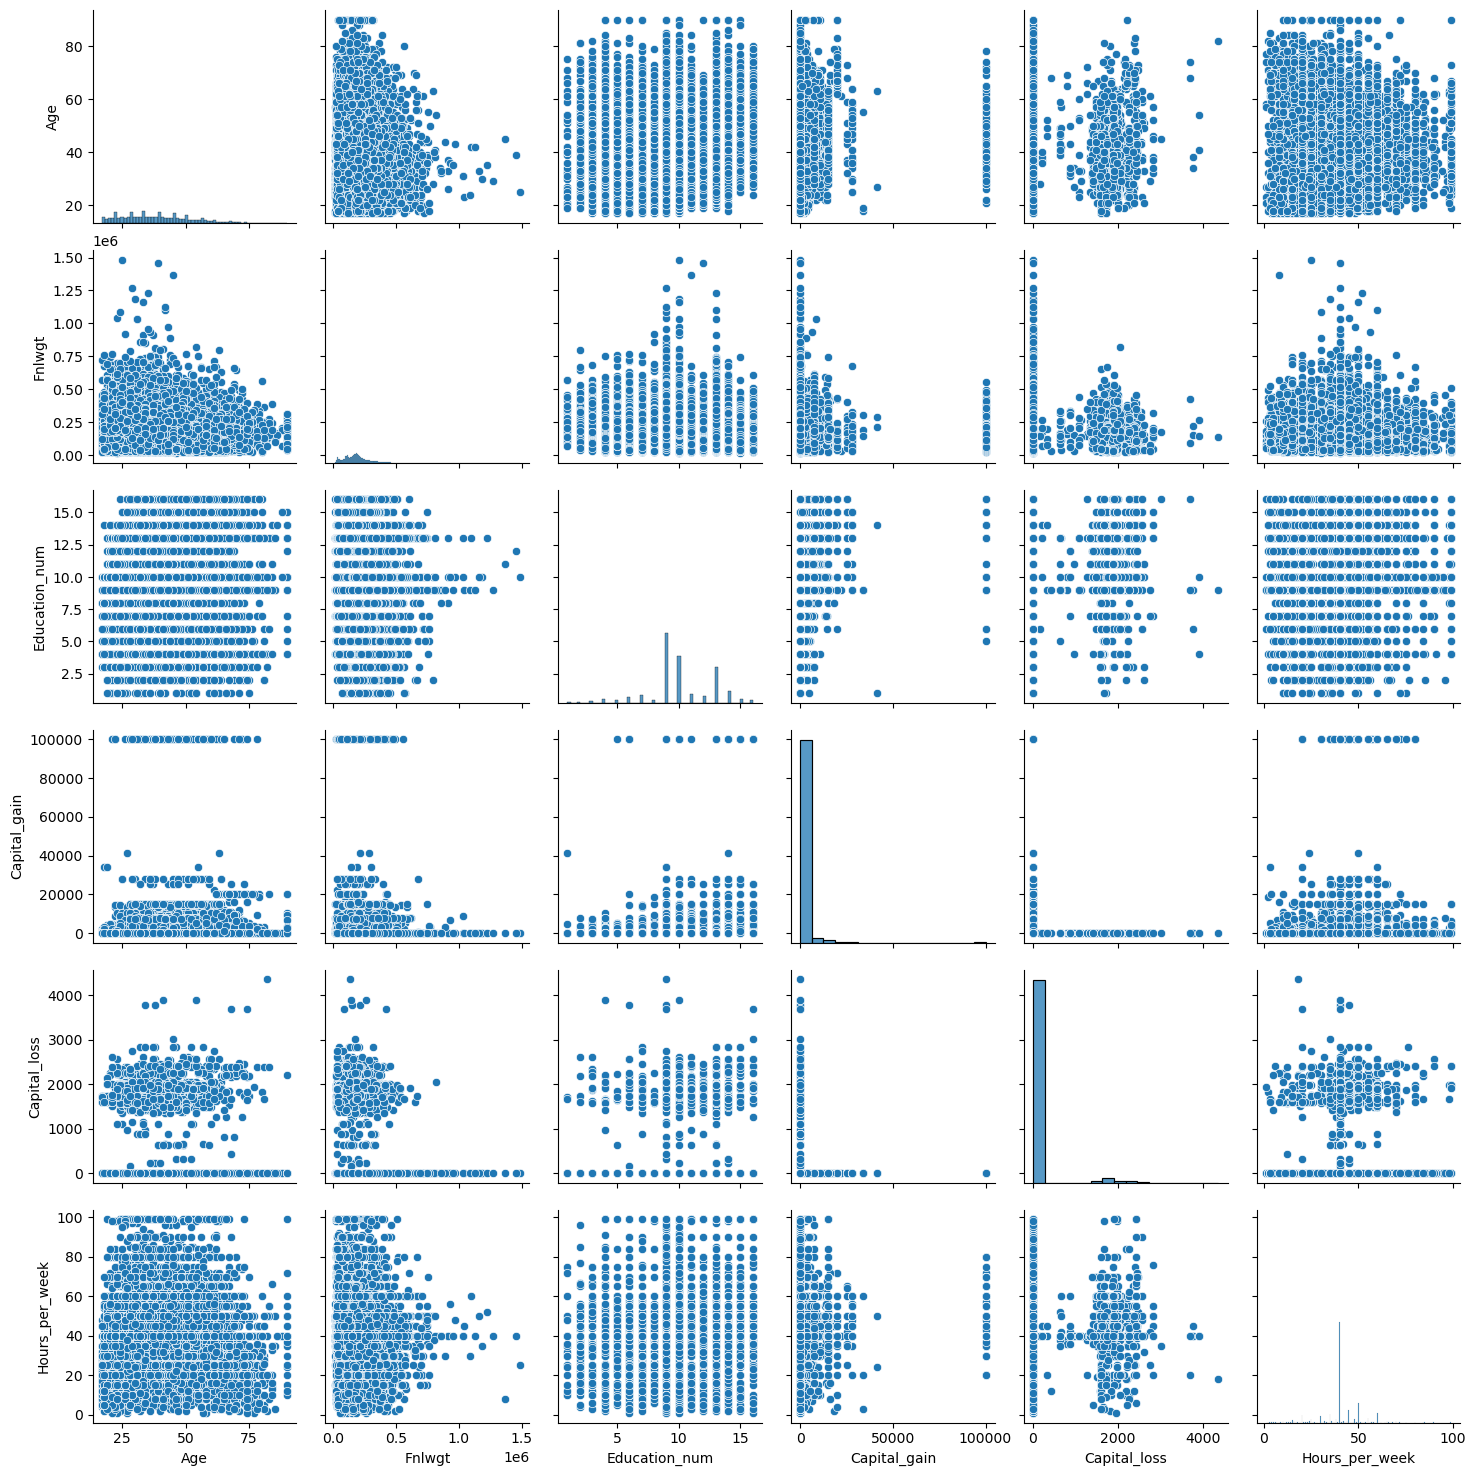

In [56]:
sns.pairplot(census_3)

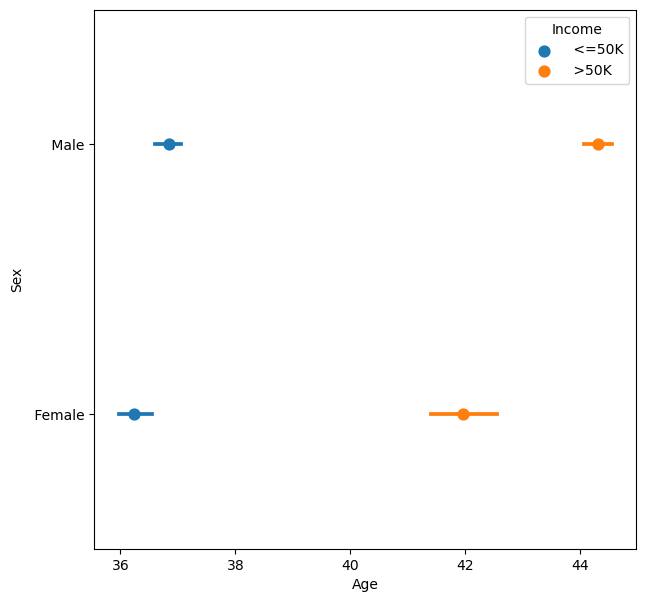

In [60]:
#Relationship between Age and Sex distribution
plt.figure(figsize = (7,7))
sns.pointplot(x='Age' , y='Sex', data = census_3, hue = 'Income',join = False)
plt.xlabel('Age')
plt.ylabel('Sex')
plt.show()

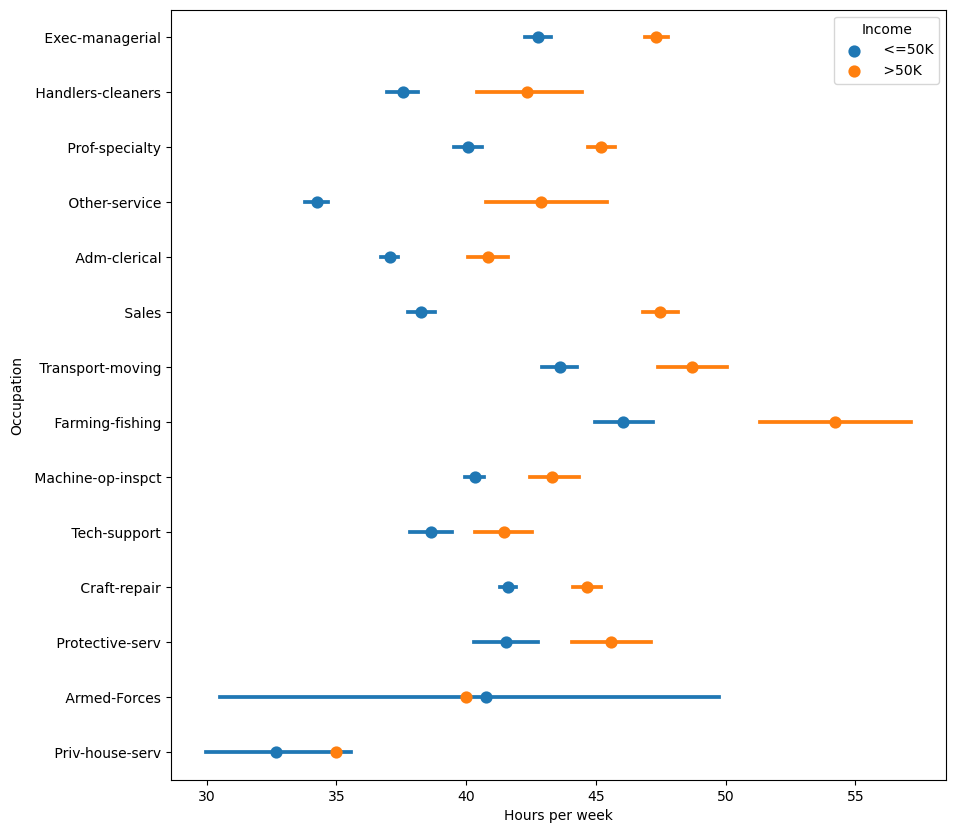

In [66]:
#Relationship between Occupation and Hours per week distribution
plt.figure(figsize = (10,10))
sns.pointplot(x='Hours_per_week' , y='Occupation', data = census_3, hue = 'Income',join = False)
plt.xlabel('Hours per week')
plt.ylabel('Occupation')
plt.show()

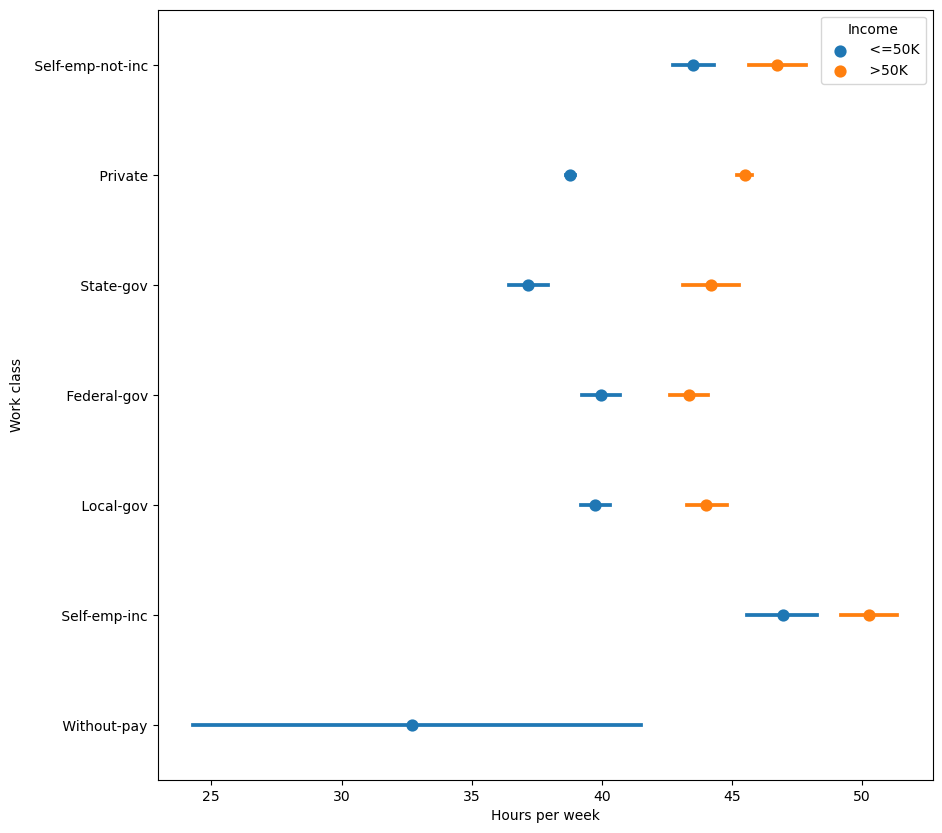

In [67]:
#Relationship between Work Class and Hours per week distribution
plt.figure(figsize = (10,10))
sns.pointplot(x='Hours_per_week' , y='Workclass', data = census_3, hue = 'Income',join = False)
plt.xlabel('Hours per week')
plt.ylabel('Work class')
plt.show()

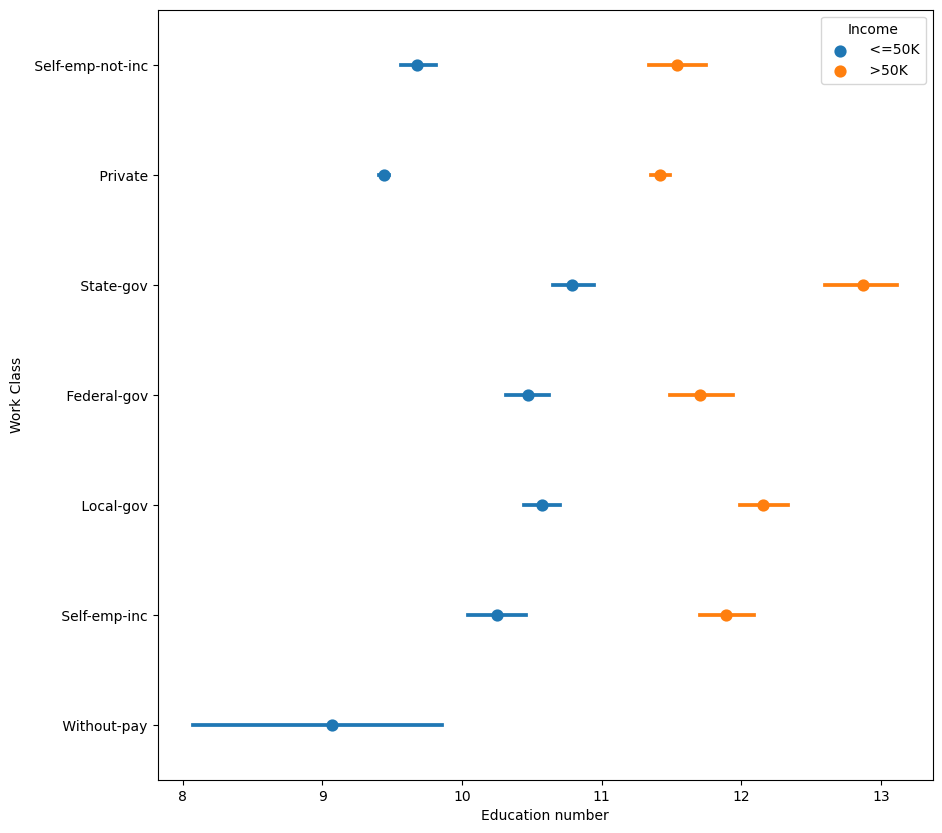

In [68]:
#Relationship between Occupation and Hours per week distribution
plt.figure(figsize = (10,10))
sns.pointplot(x='Education_num' , y='Workclass', data = census_3, hue = 'Income',join = False)
plt.xlabel('Education number')
plt.ylabel('Work Class')
plt.show()

### Feature Engineering and Feature Selection 

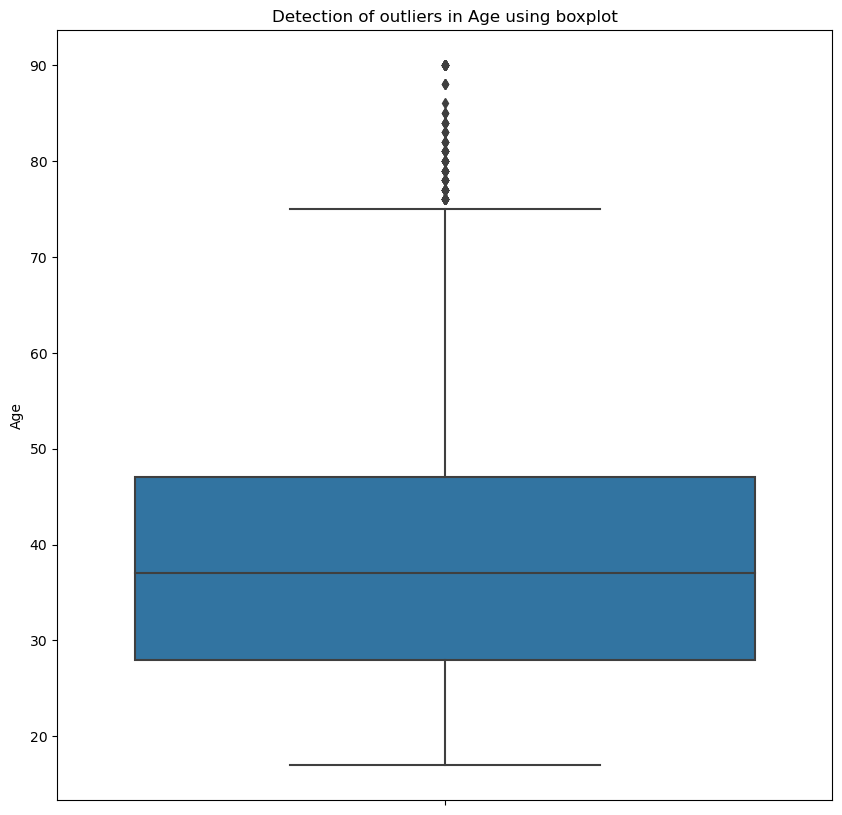

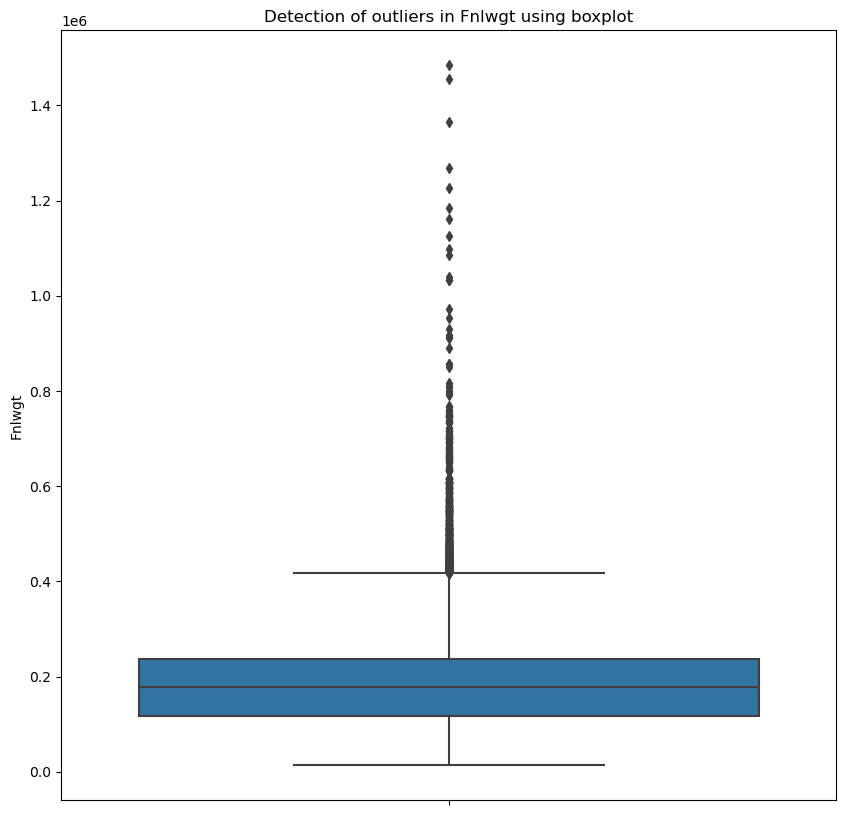

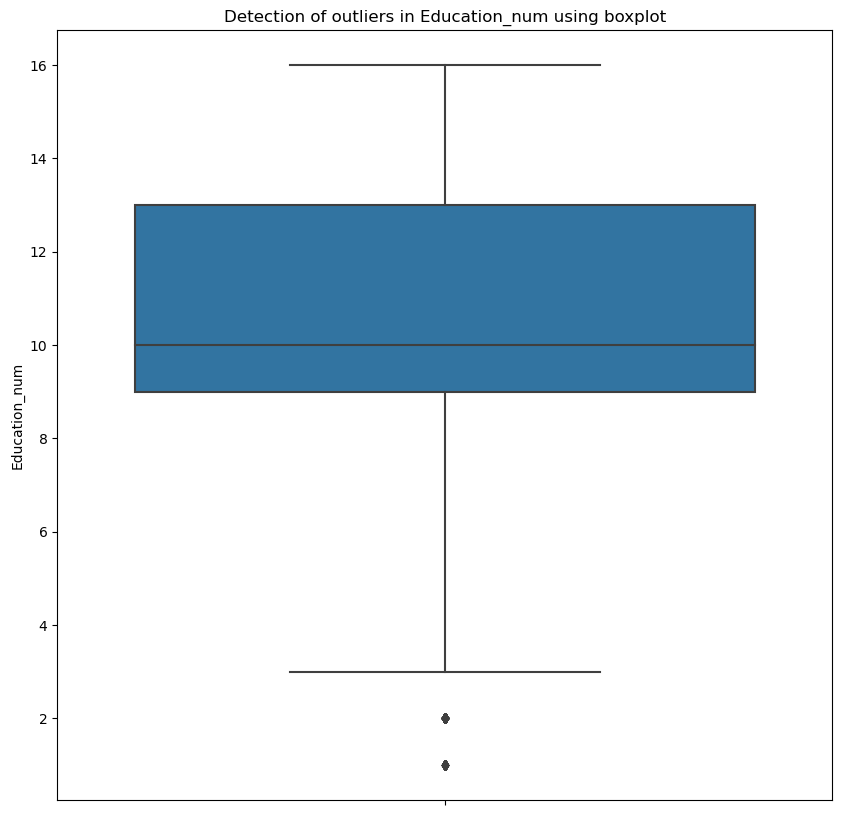

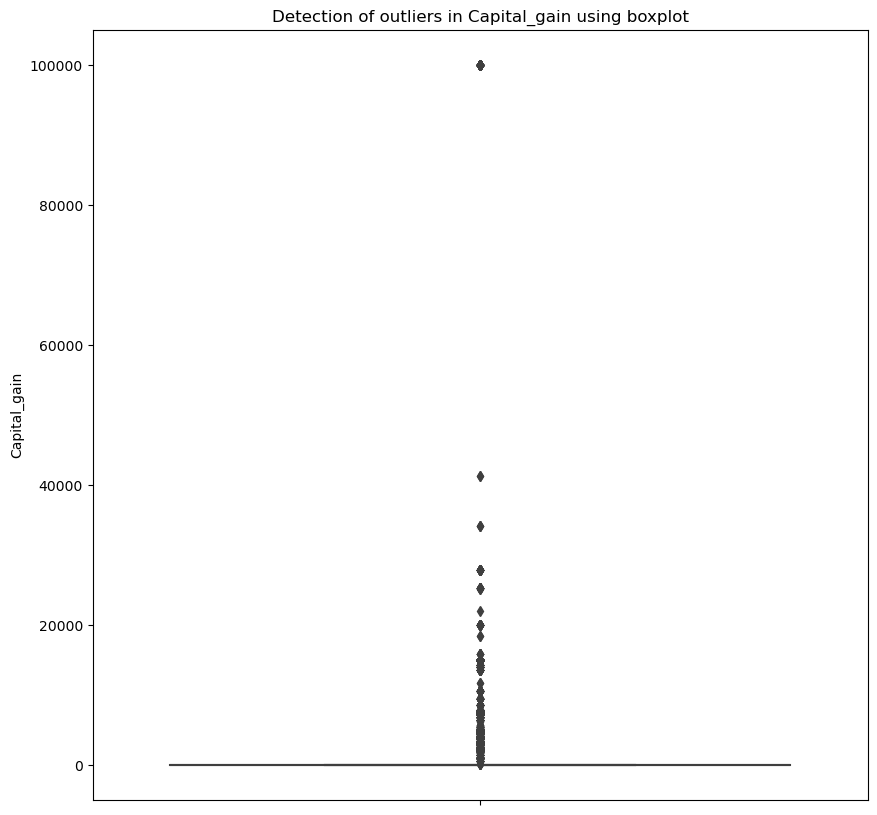

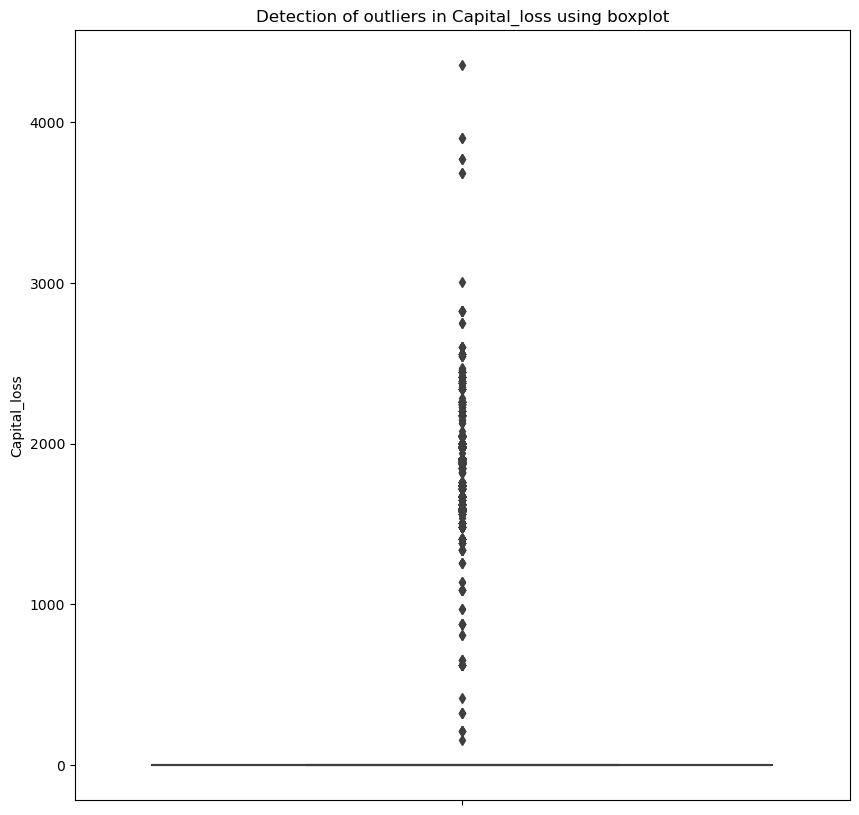

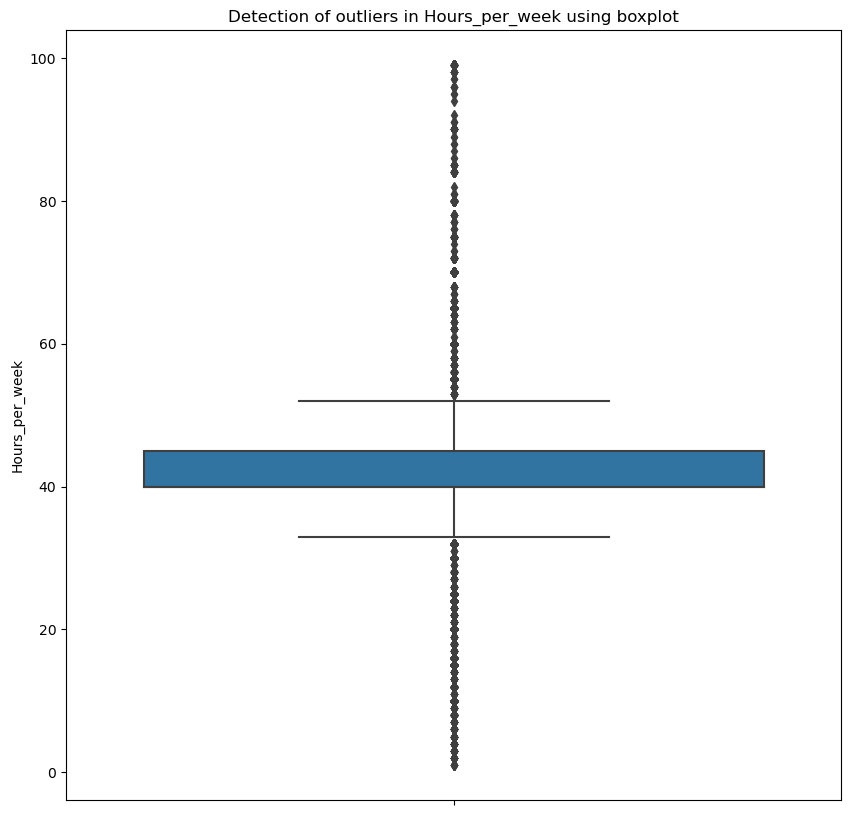

In [69]:
##Checking for outliers using boxplots and removing them if necessary
for numerical_feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(y=numerical_feature,data = census_3)
    plt.title('Detection of outliers in {} using boxplot'.format(numerical_feature))
plt.show()

In [152]:
#Instead of removing outliers from the 'Capital_gain' and 'Capital_loss' we wil be dropping these columns as they are not much important for our prediction process
census_3.drop("Capital_gain",axis=1,inplace=True)
census_3.drop("Capital_loss",axis=1,inplace=True)

-- No need to remove outliers for this dataset, as the data is very meaningful and realistic (except Capital gain and loss)

In [153]:
census_3

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [154]:
#Dropping the column 'Native_country' as majority of them are US citizen as this data is extracted on the basis of US census data and also not much information provided for the prediction purpose.
census_3.drop("Native_country",axis=1,inplace=True)

In [155]:
census_3

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,<=50K


-- Correlation Analysis

In [129]:
#Correlation among numerical columns
census_cor = census_3.corr()
census_cor

,Age,Fnlwgt,Education_num,Hours_per_week
Age,1.000000,-0.076279,0.043202,0.101349
Fnlwgt,-0.076279,1.000000,-0.045161,-0.023037
Education_num,0.043202,-0.045161,1.000000,0.152848
Hours_per_week,0.101349,-0.023037,0.152848,1.000000


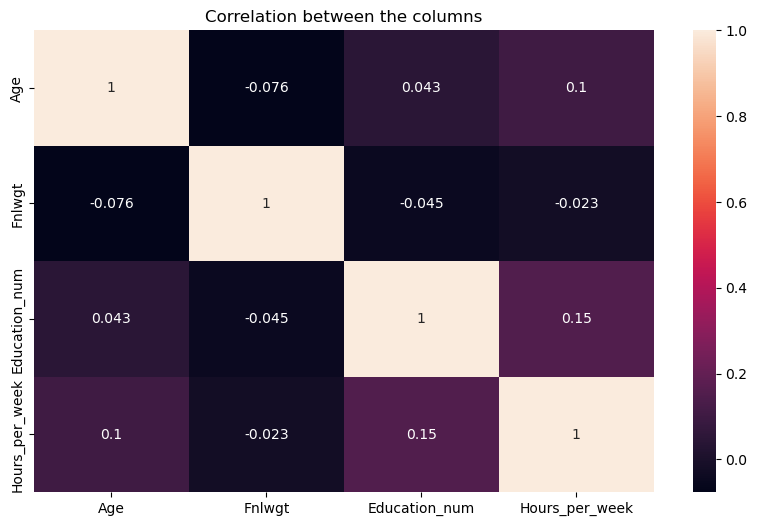

In [130]:
plt.figure(figsize=(10,6))
sns.heatmap(census_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

In [131]:
#Checking Skewness of data
census_3.skew()

Age               0.528967
Fnlwgt            1.460047
Education_num    -0.302794
Hours_per_week    0.332373
dtype: float64

-- No need to remove skewness.

### Data Preprocessing 

In [156]:
census_3

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,<=50K


-- Label Encoding

In [157]:
cat_col = []
for i in census_3.dtypes.index:
    if census_3.dtypes[i] == "object":
        cat_col.append(i)
print("Categorical Variables: ",cat_col)

Categorical Variables:  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Income']


In [158]:
for i in cat_col:
    print(f"Categories in {i} variable: ",end=" ")
    print(census_3[i].unique())

Categories in Workclass variable:  [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
Categories in Education variable:  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
Categories in Marital_status variable:  [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Categories in Occupation variable:  [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' Craft-repair'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Categories in Relationship variable:  [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Categories in Race variable:  [' White' ' Black' ' Asian-Pac-Isla

In [159]:
bool_columns = ['Sex']
for i in bool_columns:
    census_3[i+'_new'] = census_3[i].apply(lambda x : 1 if x == ' Male' else 0)
    census_3.drop(i,axis=1,inplace=True)

In [160]:
bool_columns = ['Income']
for i in bool_columns:
    census_3[i+'_new'] = census_3[i].apply(lambda x : 1 if x == ' >50K' else 0)
    census_3.drop(i,axis=1,inplace=True)

In [161]:
census_3

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Hours_per_week,Sex_new,Income_new
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,13,1,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,40,1,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,40,1,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,40,0,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,38,0,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,40,1,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,40,0,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,20,1,0


In [162]:
cat_col = ['Workclass','Education','Marital_status','Occupation','Relationship','Race']
cen_final = pd.get_dummies(census_3,columns=cat_col)
print (cen_final)

       Age  Fnlwgt  Education_num  Hours_per_week  Sex_new  Income_new  \
0       50   83311             13              13        1           0   
1       38  215646              9              40        1           0   
2       53  234721              7              40        1           0   
3       28  338409             13              40        0           0   
4       37  284582             14              40        0           0   
...    ...     ...            ...             ...      ...         ...   
32555   27  257302             12              38        0           0   
32556   40  154374              9              40        1           1   
32557   58  151910              9              40        0           0   
32558   22  201490              9              20        1           0   
32559   52  287927              9              40        0           1   

       Workclass_ Federal-gov  Workclass_ Local-gov  Workclass_ Private  \
0                           0       

In [163]:
cen_final

,Age,Fnlwgt,Education_num,Hours_per_week,Sex_new,Income_new,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White
0,50,83311,13,13,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,38,215646,9,40,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,53,234721,7,40,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,40,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,37,284582,14,40,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,38,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
32556,40,154374,9,40,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
32557,58,151910,9,40,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
32558,22,201490,9,20,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [164]:
cen_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30138 entries, 0 to 32559
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Age                                    30138 non-null  int64
 1   Fnlwgt                                 30138 non-null  int64
 2   Education_num                          30138 non-null  int64
 3   Hours_per_week                         30138 non-null  int64
 4   Sex_new                                30138 non-null  int64
 5   Income_new                             30138 non-null  int64
 6   Workclass_ Federal-gov                 30138 non-null  uint8
 7   Workclass_ Local-gov                   30138 non-null  uint8
 8   Workclass_ Private                     30138 non-null  uint8
 9   Workclass_ Self-emp-inc                30138 non-null  uint8
 10  Workclass_ Self-emp-not-inc            30138 non-null  uint8
 11  Workclass_ State-gov        

In [165]:
#Now Splitting the dataframe into feature and target variables
cen_final

,Age,Fnlwgt,Education_num,Hours_per_week,Sex_new,Income_new,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White
0,50,83311,13,13,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,38,215646,9,40,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,53,234721,7,40,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,40,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,37,284582,14,40,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,38,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
32556,40,154374,9,40,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
32557,58,151910,9,40,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
32558,22,201490,9,20,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [166]:
y = cen_final['Income_new']
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income_new, Length: 30138, dtype: int64

In [167]:
y.value_counts()

0    22632
1     7506
Name: Income_new, dtype: int64

-- As there is significant difference in the classes, we we shall be performing some oversampling technique (SMOTE) to make the data balanced.

In [168]:
x = cen_final.drop("Income_new",axis=1)
x

,Age,Fnlwgt,Education_num,Hours_per_week,Sex_new,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,...,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White
0,50,83311,13,13,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,38,215646,9,40,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,53,234721,7,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,40,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,37,284582,14,40,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,38,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
32556,40,154374,9,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
32557,58,151910,9,40,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
32558,22,201490,9,20,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [169]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x))

In [170]:
X

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.880201,-1.007866,1.129039,-2.332024,0.692742,-0.179722,-0.271357,-1.681527,-0.192231,3.326387,...,-0.586470,-0.174339,-0.416870,-0.345324,-0.221213,-0.097881,-0.174844,-0.321041,-0.087886,0.403900
1,-0.033637,0.244634,-0.440398,-0.078033,0.692742,-0.179722,-0.271357,0.594697,-0.192231,-0.300626,...,1.705118,-0.174339,-0.416870,-0.345324,-0.221213,-0.097881,-0.174844,-0.321041,-0.087886,0.403900
2,1.108661,0.425172,-1.225117,-0.078033,0.692742,-0.179722,-0.271357,0.594697,-0.192231,-0.300626,...,-0.586470,-0.174339,-0.416870,-0.345324,-0.221213,-0.097881,-0.174844,3.114870,-0.087886,-2.475859
3,-0.795169,1.406540,1.129039,-0.078033,-1.443538,-0.179722,-0.271357,0.594697,-0.192231,-0.300626,...,-0.586470,-0.174339,-0.416870,-0.345324,4.520540,-0.097881,-0.174844,3.114870,-0.087886,-2.475859
4,-0.109790,0.897087,1.521398,-0.078033,-1.443538,-0.179722,-0.271357,0.594697,-0.192231,-0.300626,...,-0.586470,-0.174339,-0.416870,-0.345324,4.520540,-0.097881,-0.174844,-0.321041,-0.087886,0.403900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30133,-0.871322,0.638893,0.736679,-0.244995,-1.443538,-0.179722,-0.271357,0.594697,-0.192231,-0.300626,...,-0.586470,-0.174339,-0.416870,-0.345324,4.520540,-0.097881,-0.174844,-0.321041,-0.087886,0.403900
30134,0.118669,-0.335282,-0.440398,-0.078033,0.692742,-0.179722,-0.271357,0.594697,-0.192231,-0.300626,...,-0.586470,-0.174339,-0.416870,-0.345324,-0.221213,-0.097881,-0.174844,-0.321041,-0.087886,0.403900
30135,1.489427,-0.358603,-0.440398,-0.078033,-1.443538,-0.179722,-0.271357,0.594697,-0.192231,-0.300626,...,-0.586470,-0.174339,-0.416870,2.895835,-0.221213,-0.097881,-0.174844,-0.321041,-0.087886,0.403900
30136,-1.252088,0.110653,-0.440398,-1.747656,0.692742,-0.179722,-0.271357,0.594697,-0.192231,-0.300626,...,-0.586470,-0.174339,2.398827,-0.345324,-0.221213,-0.097881,-0.174844,-0.321041,-0.087886,0.403900


In [171]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X1,y1 = sm.fit_resample(X,y)

In [172]:
y1.value_counts()

0    22632
1    22632
Name: Income_new, dtype: int64

In [173]:
X1.shape

(45264, 60)

In [176]:
# Now, Splitting the data into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.20,random_state = 42)

In [177]:
print("X_train ",X_train.shape)
print("y_train ",y_train.shape)
print("X_test ",X_test.shape)
print("y_test ",y_test.shape)

X_train  (36211, 60)
y_train  (36211,)
X_test  (9053, 60)
y_test  (9053,)


### Model Training 

#### Logistic Regression 

In [178]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [179]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test,logreg_pred)
print('Test accuracy is: {:.2f}%'.format(logreg_acc*100))

Test accuracy is: 81.20%


In [180]:
print(classification_report(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      4509
           1       0.79      0.85      0.82      4544

    accuracy                           0.81      9053
   macro avg       0.81      0.81      0.81      9053
weighted avg       0.81      0.81      0.81      9053



In [181]:
a = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[3504 1005]
 [ 697 3847]]
TN:  3504
FN:  697
TP:  3847
FP:  1005


#### Decision Tree Classifier 

In [182]:
#importing necessary libraries
from sklearn.tree import DecisionTreeClassifier

In [183]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(dtree_acc*100))

Test accuracy is: 83.11%


In [184]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4509
           1       0.83      0.83      0.83      4544

    accuracy                           0.83      9053
   macro avg       0.83      0.83      0.83      9053
weighted avg       0.83      0.83      0.83      9053



In [185]:
a = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[3743  766]
 [ 763 3781]]
TN:  3743
FN:  763
TP:  3781
FP:  766


#### Random Forest Classifier 

In [214]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

In [215]:
r_f = RandomForestClassifier()
r_f.fit(X_train,y_train)
r_f_pred = r_f.predict(X_test)
r_f_acc = accuracy_score(r_f_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(r_f_acc*100))

Test accuracy is: 87.47%


In [188]:
print(classification_report(y_test,r_f_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      4509
           1       0.86      0.90      0.88      4544

    accuracy                           0.87      9053
   macro avg       0.88      0.87      0.87      9053
weighted avg       0.88      0.87      0.87      9053



In [189]:
a = confusion_matrix(y_test, r_f_pred, labels=r_f.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[3851  658]
 [ 474 4070]]
TN:  3851
FN:  474
TP:  4070
FP:  658


#### Support Vector Classifier 

In [190]:
from sklearn.svm import SVC

In [191]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(svc_acc*100))

Test accuracy is: 82.97%


In [192]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      4509
           1       0.80      0.88      0.84      4544

    accuracy                           0.83      9053
   macro avg       0.83      0.83      0.83      9053
weighted avg       0.83      0.83      0.83      9053



In [193]:
a = confusion_matrix(y_test, svc_pred, labels=svc.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[3531  978]
 [ 564 3980]]
TN:  3531
FN:  564
TP:  3980
FP:  978


#### K-neighbor Classifier 

In [194]:
from sklearn.neighbors import KNeighborsClassifier

In [195]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(knn_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(knn_acc*100))

Test accuracy is: 83.97%


In [196]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      4509
           1       0.80      0.91      0.85      4544

    accuracy                           0.84      9053
   macro avg       0.85      0.84      0.84      9053
weighted avg       0.85      0.84      0.84      9053



In [197]:
a = confusion_matrix(y_test, knn_pred, labels=knn.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[3455 1054]
 [ 397 4147]]
TN:  3455
FN:  397
TP:  4147
FP:  1054


#### Naive-Bayes Classifier 

In [198]:
from sklearn.naive_bayes import GaussianNB

In [199]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(nb_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(nb_acc*100))

Test accuracy is: 71.83%


In [200]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.90      0.49      0.63      4509
           1       0.65      0.95      0.77      4544

    accuracy                           0.72      9053
   macro avg       0.77      0.72      0.70      9053
weighted avg       0.77      0.72      0.70      9053



In [201]:
a = confusion_matrix(y_test, nb_pred, labels=nb.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[2208 2301]
 [ 249 4295]]
TN:  2208
FN:  249
TP:  4295
FP:  2301


### Cross-Validation 

In [202]:
from sklearn.model_selection import cross_val_score

In [203]:
#Random Forest Classifier
score = cross_val_score(r_f,X1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,r_f_pred) - score.mean())

[0.81696675 0.84623882 0.90787584 0.91074782 0.90631905]
0.8776296546790128
Difference between Accuracy score and cross validation score is -  -0.002671077411808498


In [204]:
#K-neighbor Classifier 
score = cross_val_score(knn,X1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,knn_pred) - score.mean())

[0.81972827 0.83022203 0.84933171 0.84877941 0.84710561]
0.8390334056249203
Difference between Accuracy score and cross validation score is -  0.0006882336106921461


In [205]:
#Decision Tree Classifier 
score = cross_val_score(dtree,X1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,dtree_pred) - score.mean())

[0.73765603 0.78603778 0.86280791 0.85905225 0.86290323]
0.8216914371639416
Difference between Accuracy score and cross validation score is -  0.009414273650153238


-- Conclusion:

From the model training and the cross val scores (of the top three models) done in the previous section, I am going to choose Random Forest Classifier (RFC) as my final model for the prediction of  whether a person makes over or under $ 50K a year .

(?) - The reason I chose RFC as my final model, is because of it's really good performance with the classification of values. The accuracy score of the model is the highest of all the classification models tested which is (87.47%) and from the classification report, we see that the precision, recall and f1 scores are well balanced and have a really good scores individually too.. And from the confusion matrix, we see that the ratio of TP and TN is really good as compared to other models.

Finally, from the cross val scores of the top 3 models (i.e Random Forest Classifier,KNN and Decision Tree Classifier) RFC has equal accuracy scores across the five folds.

Therefore, RFC is our best and final Model.

#### Plotting AUC-ROC curve 

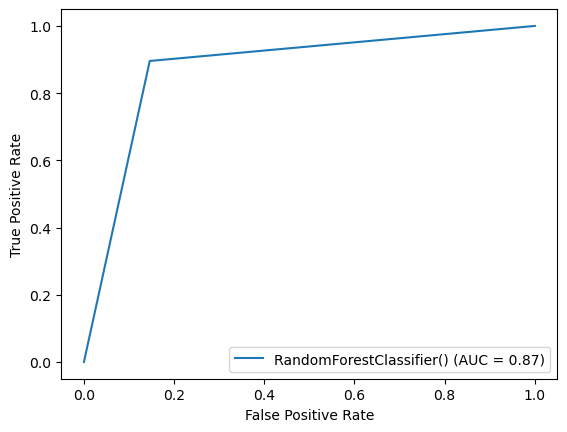

In [206]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,r_f_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=r_f)
display.plot()

### Hyper-Parameter Tuning 

In [207]:
print(r_f.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [208]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'bootstrap': [True,False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
rfc = RandomForestClassifier()
random_search = RandomizedSearchCV(rfc,param_distributions=param_dist,cv=3)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [80, 90, 100, 110],
                                        'max_features': [2, 3],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]})

In [209]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 2,
 'max_depth': 90,
 'bootstrap': False}

In [222]:
Final_model = RandomForestClassifier(n_estimators = 1000, min_samples_split = 10,min_samples_leaf = 3,max_features = 4,max_depth = 500,bootstrap = False)
Final_model.fit(X_train,y_train)
fm_pred = Final_model.predict(X_test)
fm_acc = accuracy_score(fm_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(fm_acc*100))

Test accuracy is: 85.73%


-- After many tries, we could not increase the accuracy of the model (using Hyper Parameter Tuning) so we are going to use the below model (same as the one tested before) as our final model.

In [233]:
Final_model_1 = RandomForestClassifier(n_estimators = 100, min_samples_split = 2,min_samples_leaf = 1,max_features = 'sqrt',max_depth = None,bootstrap = True)
Final_model_1.fit(X_train,y_train)
fm1_pred = Final_model_1.predict(X_test)
fm1_acc = accuracy_score(fm1_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(fm1_acc*100))

Test accuracy is: 87.53%


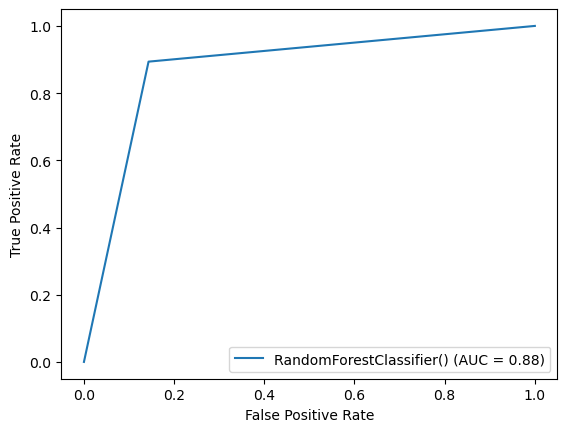

In [237]:
#AUC-ROC curve
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,fm1_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model_1)
display.plot()

### Saving the Model

In [234]:
import joblib
joblib.dump(Final_model_1,"Census_Income_Prediction_Project.pkl")

['Census_Income_Prediction_Project.pkl']

In [235]:
model = joblib.load("Census_Income_Prediction_Project.pkl")
prediction = model.predict(X_test)
prediction

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [236]:
b = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = b
df

,Predicted,Original
0,1,1
1,0,0
2,0,1
3,1,1
4,1,1
...,...,...
9048,0,0
9049,1,1
9050,1,0
9051,0,1
